WORLD DATA by country (2020)

In my project, I analyzed statistics from various countries in 2020 to gain key insights. Through exploring relationships between variables, I discovered intriguing findings. My understanding of the countries and continents I researched also expanded during the project.

My project involved studying data from different countries in 2020 to draw important conclusions about countries and continents. I examined the relationships between variables and uncovered fascinating insights. Additionally, I developed a deeper understanding of the countries and continents I researched.

Fertility rate measures the average number of children a woman will give birth to over her lifetime.

GDP(PPP) per capita measures the average GDP per capita, accounting for a country's living costs and inflation rate.

Life expectancy measures the average lifespan of a population.

Meat consumption (kg/person) measures the amount of meat a person consumes on average per year.

Population growth (%) measures the percentage by which a population has grown.

Median age measures the midpoint of the age distribution in a population.

Sex ratio measures the ratio of males to females in a population. A value of 1.02 indicates that the country has more males than females.

Suicide rate measures the number of suicides per 100,000 people.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pycountry_convert as pc

In [2]:
pip install pycountry_convert

Note: you may need to restart the kernel to use updated packages.


In [3]:
fertility = pd.read_csv('Fertility.csv')

In [4]:
fertility .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  201 non-null    int64  
 1   Unnamed: 0    201 non-null    int64  
 2   Country       201 non-null    object 
 3   Fertility     201 non-null    float64
 4   ISO-code      201 non-null    object 
 5   continent     195 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [5]:
def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        return continent_name
    except:
        return None

fertility['continent'] = fertility['Country'].apply(get_continent)

print(fertility)

     Unnamed: 0.1  Unnamed: 0         Country  Fertility ISO-code continent
0               0           0     Afghanistan        4.5      AFG        AS
1               1           1         Albania        1.6      ALB        EU
2               2           2         Algeria        3.0      DZA        AF
3               3           3         Andorra        1.3      AND        EU
4               4           4          Angola        5.5      AGO        AF
..            ...         ...             ...        ...      ...       ...
196           196         196         Vietnam        2.0      VNM        AS
197           197         197  Virgin Islands        2.1      VIR      None
198           198         198           Yemen        3.8      YEM        AS
199           199         199          Zambia        4.6      ZMB        AF
200           200         200        Zimbabwe        3.6      ZWE        AF

[201 rows x 6 columns]


In [6]:
fertility['continent'] = fertility['continent'].replace('AS','Asia')
fertility['continent'] = fertility['continent'].replace('EU','Europe')
fertility['continent'] = fertility['continent'].replace('AF','Africa')
fertility['continent'] = fertility['continent'].replace('NA','North America')

fertility['continent'] = fertility['continent'].replace('SA','South America')
fertility['continent'] = fertility['continent'].replace('OC','Oceania')


In [7]:
fertility .isna().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Country         0
Fertility       0
ISO-code        0
continent       6
dtype: int64

In [8]:
fertility .duplicated().sum()

0

In [9]:
fertility['continent'].value_counts()

Africa           53
Asia             48
Europe           44
North America    23
Oceania          15
South America    12
Name: continent, dtype: int64

In [10]:
fertility

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,ISO-code,continent
0,0,0,Afghanistan,4.5,AFG,Asia
1,1,1,Albania,1.6,ALB,Europe
2,2,2,Algeria,3.0,DZA,Africa
3,3,3,Andorra,1.3,AND,Europe
4,4,4,Angola,5.5,AGO,Africa
...,...,...,...,...,...,...
196,196,196,Vietnam,2.0,VNM,Asia
197,197,197,Virgin Islands,2.1,VIR,None
198,198,198,Yemen,3.8,YEM,Asia
199,199,199,Zambia,4.6,ZMB,Africa


In [11]:
fertility.to_csv('fertile.csv')

In [12]:
fertility.sort_values(by='Fertility',ascending=False).head(5)

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,ISO-code,continent
165,165,165,Somalia,6.1,SOM,Africa
45,45,45,Democratic Republic of the Congo,5.9,COD,Africa
112,112,112,Mali,5.9,MLI,Africa
34,34,34,Chad,5.7,TCD,Africa
4,4,4,Angola,5.5,AGO,Africa


A Fertility rate of 4.5 indicates that on average women will have 4.5 children throughout her lifetime. 

In [13]:
gdp = pd.read_csv('GDP per capita.csv')

In [14]:
gdp.isna().sum()

Country           0
GDP per capita    0
ISO-code          0
dtype: int64

In [15]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         191 non-null    object 
 1   GDP per capita  191 non-null    float64
 2   ISO-code        191 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.6+ KB


In [16]:
gdp.head()

,Country,GDP per capita,ISO-code
0,Afghanistan,2182.0,AFG
1,Albania,14866.0,ALB
2,Algeria,16091.0,DZA
3,Angola,6763.0,AGO
4,Antigua and Barbuda,30593.0,ATG


In [17]:
gdp[gdp['Country']=='United States']

,Country,GDP per capita,ISO-code
182,United States,67426.0,USA


In 2019, the estimated average GDP per capita (PPP) of all of the countries of the world was Int$ 18,381.[a] For rankings regarding wealth, see list of countries by wealth per adult. GDP per capia(PPP) is adjusted for a country's relative living cost  and the inflation rate of the country. 

In [18]:
life_exp = pd.read_csv('Life expectancy.csv')
life_exp

,Country,Life expectancy,ISO-code
0,Afghanistan,64.5,AFG
1,Algeria,76.7,DZA
2,Andorra,81.8,AND
3,Angola,60.8,AGO
4,Antigua and Barbuda,76.9,ATG
...,...,...,...
180,Venezuela,72.1,VEN
181,Vietnam,75.3,VNM
182,Yemen,66.1,YEM
183,Zambia,63.5,ZMB


In [19]:
life_exp.isna().sum()

Country            0
Life expectancy    0
ISO-code           0
dtype: int64

In [20]:
life_exp.duplicated().sum()

0

In [21]:
meat = pd.read_csv('Meat consumption.csv')
meat.head()

,Country,Meat consumption,ISO-code
0,Afghanistan,17.3,AFG
1,Algeria,18.3,DZA
2,American Samoa,24.9,ASM
3,Angola,19.0,AGO
4,Antigua and Barbuda,56.0,ATG


17.3 means that the average person in Afghanistan consumed 17.3 kg of meat in 2020

In [22]:
meat.isna().sum()

Country             0
Meat consumption    0
ISO-code            1
dtype: int64

In [23]:
meat[meat['ISO-code'].isna()]

,Country,Meat consumption,ISO-code
54,FR Yugoslavia,77.6,NaN


In [24]:
pop = pd.read_csv('Population growth.csv')

In [25]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            207 non-null    object 
 1   Population growth  207 non-null    float64
 2   ISO-code           207 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.0+ KB


In [26]:
pop.head()

,Country,Population growth,ISO-code
0,Afghanistan,2.41,AFG
1,Albania,0.26,ALB
2,Algeria,1.89,DZA
3,American Samoa,-0.26,ASM
4,Andorra,0.63,AND


In [27]:
pop.isna().sum()

Country              0
Population growth    0
ISO-code             0
dtype: int64

In [28]:
pop.duplicated().sum()

0

In [29]:
median_age = pd.read_csv('Median age.csv')
median_age.head()

,Country,Median age,ISO-code
0,Afghanistan,27.4,AFG
1,Albania,32.9,ALB
2,Algeria,28.1,DZA
3,American Samoa,25.5,ASM
4,Andorra,44.3,AND


In [30]:
median_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     223 non-null    object 
 1   Median age  223 non-null    float64
 2   ISO-code    222 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.4+ KB


In [31]:
median_age.duplicated().sum()

0

In [32]:
sex_ratio = pd.read_csv('Sex-ratio.csv')
sex_ratio

,Country,Sex-ratio,ISO-code
0,Afghanistan,1.03,AFG
1,Albania,0.98,ALB
2,Algeria,1.03,DZA
3,American Samoa,1.00,ASM
4,Andorra,1.06,AND
...,...,...,...
221,Wallis and Futuna,1.04,WLF
222,Western Sahara,0.99,ESH
223,Yemen,1.02,YEM
224,Zambia,1.00,ZMB


A ratio of 1.03 means that there are more men than women. 

The first, urban population, describes the percentage of the total population living in urban areas, as defined by the country.

In [33]:
urbanization = pd.read_csv('Urbanization rate.csv')
urbanization.head()

,Country,Urbanization rate,ISO-code
0,Monaco,100.0,MCO
1,Nauru,100.0,NRU
2,Singapore,100.0,SGP
3,Anguilla,100.0,AIA
4,Bermuda,100.0,BMU


In [34]:
urbanization[urbanization['ISO-code']=='AFG']

,Country,Urbanization rate,ISO-code
197,Afghanistan,26.0,AFG


In [35]:
suicide = pd.read_csv('Suicide rate.csv')
suicide.head()

,Country,Suicide rate,ISO-code
0,Afghanistan,6.4,AFG
1,Albania,5.6,ALB
2,Algeria,3.3,DZA
3,Angola,8.9,AGO
4,Antigua and Barbuda,0.5,ATG


In [36]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       182 non-null    object 
 1   Suicide rate  182 non-null    float64
 2   ISO-code      182 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.4+ KB


In [37]:
suicide.isna().sum()

Country         0
Suicide rate    0
ISO-code        0
dtype: int64

In [38]:
df1 = fertility.merge(gdp,on=['Country','ISO-code'])
df1

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,ISO-code,continent,GDP per capita
0,0,0,Afghanistan,4.5,AFG,Asia,2182.0
1,1,1,Albania,1.6,ALB,Europe,14866.0
2,2,2,Algeria,3.0,DZA,Africa,16091.0
3,4,4,Angola,5.5,AGO,Africa,6763.0
4,5,5,Antigua and Barbuda,2.0,ATG,North America,30593.0
...,...,...,...,...,...,...,...
181,195,195,Venezuela,2.3,VEN,South America,16055.0
182,196,196,Vietnam,2.0,VNM,Asia,8677.0
183,198,198,Yemen,3.8,YEM,Asia,2312.0
184,199,199,Zambia,4.6,ZMB,Africa,4174.0


In [39]:
df2 = df1.merge(life_exp,on=['Country','ISO-code'])
df2

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,ISO-code,continent,GDP per capita,Life expectancy
0,0,0,Afghanistan,4.5,AFG,Asia,2182.0,64.5
1,2,2,Algeria,3.0,DZA,Africa,16091.0,76.7
2,4,4,Angola,5.5,AGO,Africa,6763.0,60.8
3,5,5,Antigua and Barbuda,2.0,ATG,North America,30593.0,76.9
4,6,6,Argentina,2.3,ARG,South America,19971.0,76.5
...,...,...,...,...,...,...,...,...
178,195,195,Venezuela,2.3,VEN,South America,16055.0,72.1
179,196,196,Vietnam,2.0,VNM,Asia,8677.0,75.3
180,198,198,Yemen,3.8,YEM,Asia,2312.0,66.1
181,199,199,Zambia,4.6,ZMB,Africa,4174.0,63.5


In [40]:
df3 = df2.merge(meat,on=['Country','ISO-code'])
df3

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,ISO-code,continent,GDP per capita,Life expectancy,Meat consumption
0,0,0,Afghanistan,4.5,AFG,Asia,2182.0,64.5,17.3
1,2,2,Algeria,3.0,DZA,Africa,16091.0,76.7,18.3
2,4,4,Angola,5.5,AGO,Africa,6763.0,60.8,19.0
3,5,5,Antigua and Barbuda,2.0,ATG,North America,30593.0,76.9,56.0
4,6,6,Argentina,2.3,ARG,South America,19971.0,76.5,79.7
...,...,...,...,...,...,...,...,...,...
176,195,195,Venezuela,2.3,VEN,South America,16055.0,72.1,56.6
177,196,196,Vietnam,2.0,VNM,Asia,8677.0,75.3,28.6
178,198,198,Yemen,3.8,YEM,Asia,2312.0,66.1,14.7
179,199,199,Zambia,4.6,ZMB,Africa,4174.0,63.5,11.9


In [41]:
df4 = df3.merge(pop,on=['Country','ISO-code'])
df4

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,ISO-code,continent,GDP per capita,Life expectancy,Meat consumption,Population growth
0,0,0,Afghanistan,4.5,AFG,Asia,2182.0,64.5,17.3,2.41
1,2,2,Algeria,3.0,DZA,Africa,16091.0,76.7,18.3,1.89
2,4,4,Angola,5.5,AGO,Africa,6763.0,60.8,19.0,3.12
3,5,5,Antigua and Barbuda,2.0,ATG,North America,30593.0,76.9,56.0,1.03
4,6,6,Argentina,2.3,ARG,South America,19971.0,76.5,79.7,0.88
...,...,...,...,...,...,...,...,...,...,...
192,195,195,Venezuela,2.3,VEN,South America,16055.0,72.1,56.6,1.53
193,196,196,Vietnam,2.0,VNM,Asia,8677.0,75.3,28.6,1.06
194,198,198,Yemen,3.8,YEM,Asia,2312.0,66.1,14.7,2.33
195,199,199,Zambia,4.6,ZMB,Africa,4174.0,63.5,11.9,3.19


In [42]:
df5 = df4.merge(median_age,on=['Country','ISO-code'])
df5

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,ISO-code,continent,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age
0,0,0,Afghanistan,4.5,AFG,Asia,2182.0,64.5,17.3,2.41,27.4
1,2,2,Algeria,3.0,DZA,Africa,16091.0,76.7,18.3,1.89,28.1
2,4,4,Angola,5.5,AGO,Africa,6763.0,60.8,19.0,3.12,15.9
3,5,5,Antigua and Barbuda,2.0,ATG,North America,30593.0,76.9,56.0,1.03,31.9
4,6,6,Argentina,2.3,ARG,South America,19971.0,76.5,79.7,0.88,31.7
...,...,...,...,...,...,...,...,...,...,...,...
223,195,195,Venezuela,2.3,VEN,South America,16055.0,72.1,56.6,1.53,28.3
224,196,196,Vietnam,2.0,VNM,Asia,8677.0,75.3,28.6,1.06,30.5
225,198,198,Yemen,3.8,YEM,Asia,2312.0,66.1,14.7,2.33,19.5
226,199,199,Zambia,4.6,ZMB,Africa,4174.0,63.5,11.9,3.19,16.8


In [43]:
df6 = df5.merge(sex_ratio,on=['Country','ISO-code'])
df6

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,ISO-code,continent,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio
0,0,0,Afghanistan,4.5,AFG,Asia,2182.0,64.5,17.3,2.41,27.4,1.03
1,2,2,Algeria,3.0,DZA,Africa,16091.0,76.7,18.3,1.89,28.1,1.03
2,4,4,Angola,5.5,AGO,Africa,6763.0,60.8,19.0,3.12,15.9,0.95
3,5,5,Antigua and Barbuda,2.0,ATG,North America,30593.0,76.9,56.0,1.03,31.9,0.89
4,6,6,Argentina,2.3,ARG,South America,19971.0,76.5,79.7,0.88,31.7,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...
287,195,195,Venezuela,2.3,VEN,South America,16055.0,72.1,56.6,1.53,28.3,0.99
288,196,196,Vietnam,2.0,VNM,Asia,8677.0,75.3,28.6,1.06,30.5,1.01
289,198,198,Yemen,3.8,YEM,Asia,2312.0,66.1,14.7,2.33,19.5,1.02
290,199,199,Zambia,4.6,ZMB,Africa,4174.0,63.5,11.9,3.19,16.8,1.00


In [44]:
df7 = df6.merge(urbanization,on=['Country','ISO-code'])
df7

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,ISO-code,continent,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio,Urbanization rate
0,0,0,Afghanistan,4.5,AFG,Asia,2182.0,64.5,17.3,2.41,27.4,1.03,26.0
1,2,2,Algeria,3.0,DZA,Africa,16091.0,76.7,18.3,1.89,28.1,1.03,73.7
2,4,4,Angola,5.5,AGO,Africa,6763.0,60.8,19.0,3.12,15.9,0.95,66.8
3,5,5,Antigua and Barbuda,2.0,ATG,North America,30593.0,76.9,56.0,1.03,31.9,0.89,24.4
4,6,6,Argentina,2.3,ARG,South America,19971.0,76.5,79.7,0.88,31.7,0.98,92.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,195,195,Venezuela,2.3,VEN,South America,16055.0,72.1,56.6,1.53,28.3,0.99,88.3
414,196,196,Vietnam,2.0,VNM,Asia,8677.0,75.3,28.6,1.06,30.5,1.01,37.3
415,198,198,Yemen,3.8,YEM,Asia,2312.0,66.1,14.7,2.33,19.5,1.02,36.6
416,199,199,Zambia,4.6,ZMB,Africa,4174.0,63.5,11.9,3.19,16.8,1.00,44.6


In [45]:
df8 = df7.merge(suicide,on=['Country','ISO-code'])
df8.head()

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,ISO-code,continent,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio,Urbanization rate,Suicide rate
0,0,0,Afghanistan,4.5,AFG,Asia,2182.0,64.5,17.3,2.41,27.4,1.03,26.0,6.4
1,2,2,Algeria,3.0,DZA,Africa,16091.0,76.7,18.3,1.89,28.1,1.03,73.7,3.3
2,4,4,Angola,5.5,AGO,Africa,6763.0,60.8,19.0,3.12,15.9,0.95,66.8,8.9
3,5,5,Antigua and Barbuda,2.0,ATG,North America,30593.0,76.9,56.0,1.03,31.9,0.89,24.4,0.5
4,6,6,Argentina,2.3,ARG,South America,19971.0,76.5,79.7,0.88,31.7,0.98,92.1,9.1


In [46]:
world= df8
world.head()

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,ISO-code,continent,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio,Urbanization rate,Suicide rate
0,0,0,Afghanistan,4.5,AFG,Asia,2182.0,64.5,17.3,2.41,27.4,1.03,26.0,6.4
1,2,2,Algeria,3.0,DZA,Africa,16091.0,76.7,18.3,1.89,28.1,1.03,73.7,3.3
2,4,4,Angola,5.5,AGO,Africa,6763.0,60.8,19.0,3.12,15.9,0.95,66.8,8.9
3,5,5,Antigua and Barbuda,2.0,ATG,North America,30593.0,76.9,56.0,1.03,31.9,0.89,24.4,0.5
4,6,6,Argentina,2.3,ARG,South America,19971.0,76.5,79.7,0.88,31.7,0.98,92.1,9.1


In [47]:
world.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Country              0
Fertility            0
ISO-code             0
continent            3
GDP per capita       0
Life expectancy      0
Meat consumption     0
Population growth    0
Median age           0
Sex-ratio            0
Urbanization rate    0
Suicide rate         0
dtype: int64

In [48]:
world.duplicated().sum()

0

In [49]:
world = world.drop('ISO-code',axis=1)
world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 673
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       674 non-null    int64  
 1   Unnamed: 0         674 non-null    int64  
 2   Country            674 non-null    object 
 3   Fertility          674 non-null    float64
 4   continent          671 non-null    object 
 5   GDP per capita     674 non-null    float64
 6   Life expectancy    674 non-null    float64
 7   Meat consumption   674 non-null    float64
 8   Population growth  674 non-null    float64
 9   Median age         674 non-null    float64
 10  Sex-ratio          674 non-null    float64
 11  Urbanization rate  674 non-null    float64
 12  Suicide rate       674 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 73.7+ KB


In [50]:
world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 673
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       674 non-null    int64  
 1   Unnamed: 0         674 non-null    int64  
 2   Country            674 non-null    object 
 3   Fertility          674 non-null    float64
 4   continent          671 non-null    object 
 5   GDP per capita     674 non-null    float64
 6   Life expectancy    674 non-null    float64
 7   Meat consumption   674 non-null    float64
 8   Population growth  674 non-null    float64
 9   Median age         674 non-null    float64
 10  Sex-ratio          674 non-null    float64
 11  Urbanization rate  674 non-null    float64
 12  Suicide rate       674 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 73.7+ KB


In [51]:
world.head()

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,continent,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio,Urbanization rate,Suicide rate
0,0,0,Afghanistan,4.5,Asia,2182.0,64.5,17.3,2.41,27.4,1.03,26.0,6.4
1,2,2,Algeria,3.0,Africa,16091.0,76.7,18.3,1.89,28.1,1.03,73.7,3.3
2,4,4,Angola,5.5,Africa,6763.0,60.8,19.0,3.12,15.9,0.95,66.8,8.9
3,5,5,Antigua and Barbuda,2.0,North America,30593.0,76.9,56.0,1.03,31.9,0.89,24.4,0.5
4,6,6,Argentina,2.3,South America,19971.0,76.5,79.7,0.88,31.7,0.98,92.1,9.1


In [52]:
world.iloc[655,2] = 'Africa'

In [53]:
world.drop_duplicates(subset='Country',keep='first',inplace=True)

In [54]:
top_fertility = world.sort_values(by='Fertility',ascending=False)[['Country','Fertility','continent']].head(15)
top_fertility

,Country,Fertility,continent
643,Somalia,6.1,Africa
604,Mali,5.9,Africa
39,Democratic Republic of the Congo,5.9,Africa
29,Chad,5.7,Africa
2,Angola,5.5,Africa
23,Burundi,5.4,Africa
619,Nigeria,5.4,Africa
618,Niger,5.3,Africa
655,Africa,5.2,None
22,Burkina Faso,5.2,Africa


In [55]:
low_fertility = world.sort_values(by='Fertility',ascending=False)[['Country','Fertility','continent']].head(15)
low_fertility

,Country,Fertility,continent
643,Somalia,6.1,Africa
604,Mali,5.9,Africa
39,Democratic Republic of the Congo,5.9,Africa
29,Chad,5.7,Africa
2,Angola,5.5,Africa
23,Burundi,5.4,Africa
619,Nigeria,5.4,Africa
618,Niger,5.3,Africa
655,Africa,5.2,None
22,Burkina Faso,5.2,Africa


In [56]:
world.loc[world['Country']=='The Gambia']['continent']

Series([], Name: continent, dtype: object)

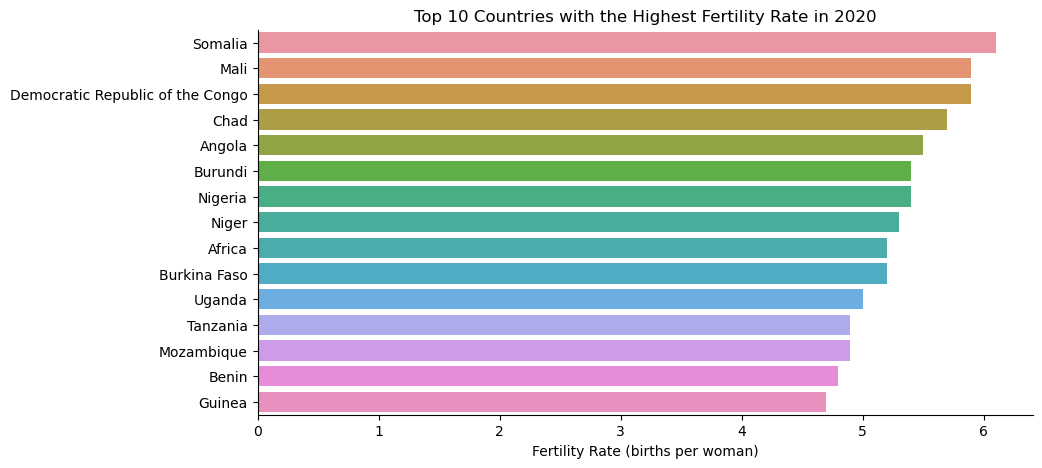

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Fertility',data=top_fertility)
plt.xlabel('Fertility Rate (births per woman)')
plt.title('Top 10 Countries with the Highest Fertility Rate in 2020')
plt.ylabel('')
sns.despine()

plt.show() 


Among the top 15 countries with the highest Fertility Rate in 2020, Somalia ranks first with an average of 6 children born to each woman during her lifetime. Mali comes in second with an average of 5.9 children per woman. It's worth noting that all countries in the top 15 are African nations.

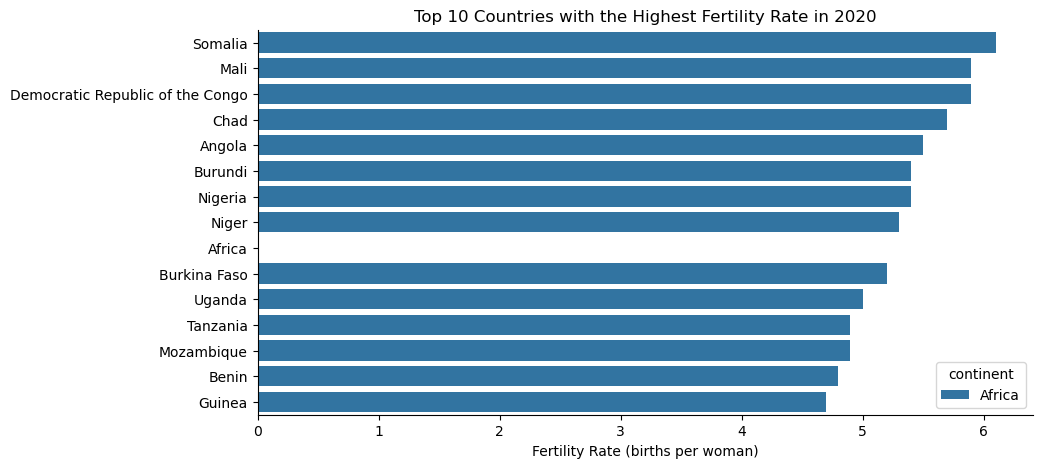

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Fertility',data=low_fertility,hue='continent')
plt.xlabel('Fertility Rate (births per woman)')
plt.title('Top 10 Countries with the Highest Fertility Rate in 2020')
plt.ylabel('')
sns.despine()

plt.show() 

In [59]:
top_pop = world.sort_values(by='Population growth',ascending=False)[['Country','Population growth','continent']].head(15)
top_pop

,Country,Population growth,continent
622,Oman,9.13,Asia
645,South Sudan,4.30,Africa
618,Niger,3.84,Africa
661,Uganda,3.35,Africa
47,Eritrea,3.28,Africa
23,Burundi,3.19,Africa
672,Zambia,3.19,Africa
655,Africa,3.19,None
2,Angola,3.12,Africa
663,United Arab Emirates,3.10,Asia


In [60]:
world.iloc[43,2] = 'Asia'

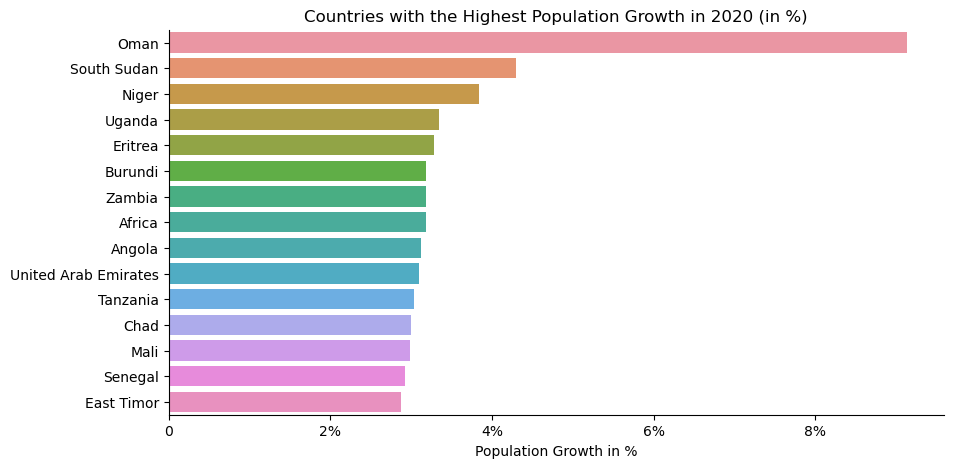

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Population growth',data=top_pop)
plt.xlabel('Population Growth in %')
plt.title('Countries with the Highest Population Growth in 2020 (in %)')
plt.ylabel('')
plt.xticks([0,2,4,6,8],['0','2%','4%','6%','8%'])
sns.despine()

plt.show()

Based on the data, the top 15 countries with the highest population growth in 2020 are displayed in the graph. Oman holds the record for the highest population growth rate worldwide, with a growth rate of 9.13% in 2020. South Sudan and Niger follow in second and third place, respectively, with population growth rates of 4.3% and 3.84%. It's worth noting that two of the top 15 countries are located in Asia, while the remaining countries are located in Africa. 

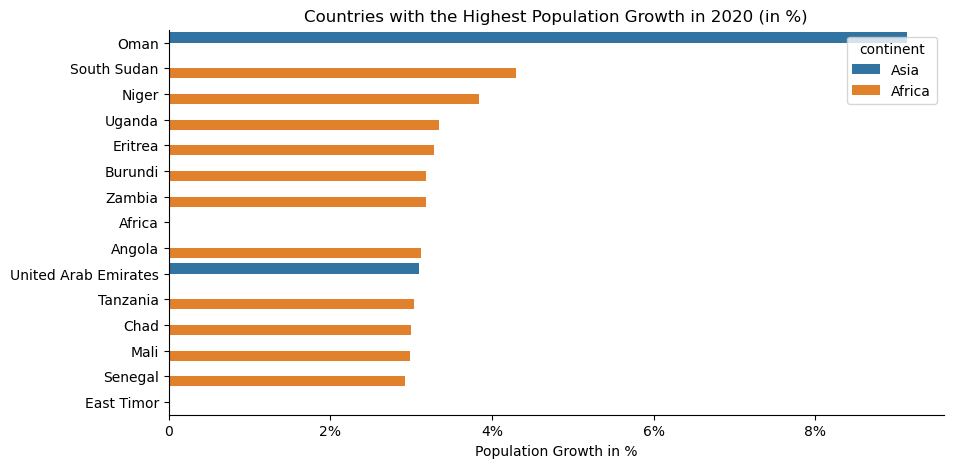

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Population growth',data=top_pop,hue='continent')
plt.xlabel('Population Growth in %')
plt.title('Countries with the Highest Population Growth in 2020 (in %)')
plt.ylabel('')
plt.xticks([0,2,4,6,8],['0','2%','4%','6%','8%'])
sns.despine()

plt.show()

In [63]:
low_pop = world.sort_values(by='Population growth',ascending=True)[['Country','Population growth','continent']].head(15)
low_pop

,Country,Population growth,continent
594,Latvia,-1.60,Europe
599,Lithuania,-1.48,Europe
21,Bulgaria,-0.60,Europe
35,Croatia,-0.32,Europe
630,Portugal,-0.29,Europe
576,Hungary,-0.28,Europe
632,Romania,-0.27,Europe
662,Ukraine,-0.25,Europe
587,Japan,-0.20,Asia
57,Greece,-0.18,Europe


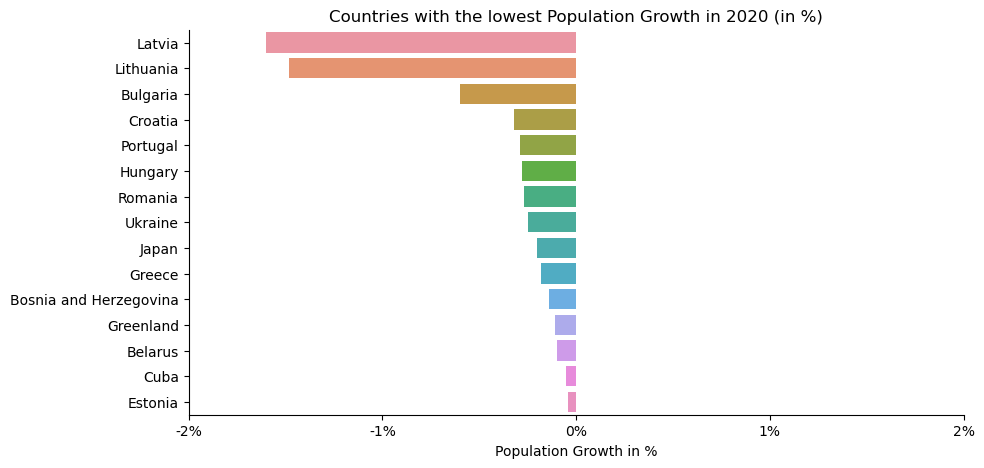

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Population growth',data=low_pop)
plt.xlabel('Population Growth in %')
plt.title('Countries with the lowest Population Growth in 2020 (in %)')
plt.ylabel('')
plt.xticks([-2,-1,0,1,2],['-2%','-1%','0%','1%','2%'])
sns.despine()
plt.show()


According to the data presented in the graph, the top 15 countries with the lowest population growth in 2020 are listed. Latvia had the lowest population growth rate in the world, with its population decreasing by 1.6%. Lithuania followed closely behind with a population decrease of 1.48%. These two countries experienced the most significant percentage drops in population. Out of the top 15 countries, 12 are located in Europe, one is in Asia, and two are in North America. The trend suggests that Europe's population is expected to decrease significantly in the upcoming years.

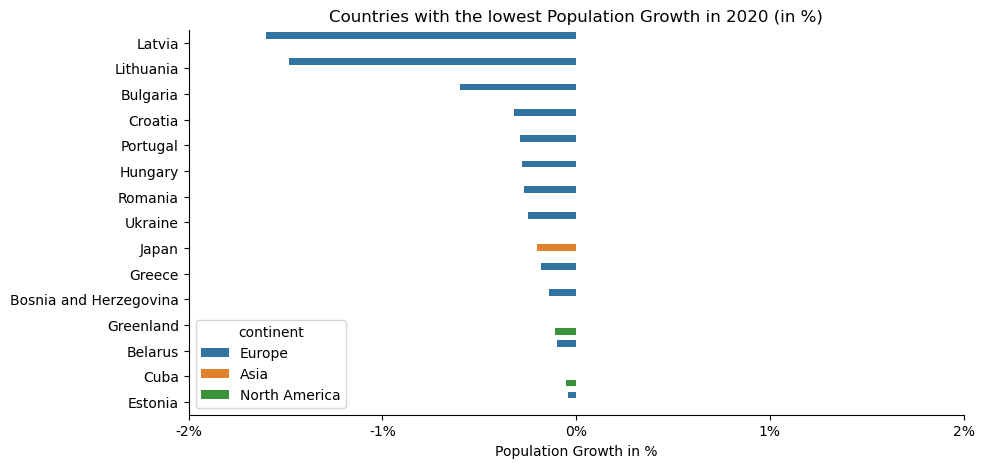

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Population growth',data=low_pop,hue='continent')
plt.xlabel('Population Growth in %')
plt.title('Countries with the lowest Population Growth in 2020 (in %)')
plt.ylabel('')
plt.xticks([-2,-1,0,1,2],['-2%','-1%','0%','1%','2%'])
sns.despine()
plt.show()


In [66]:
top_suicide =world.sort_values(by='Suicide rate',ascending=False)[['Country','Suicide rate','continent']].head(15)
top_suicide

,Country,Suicide rate,continent
573,Guyana,30.2,South America
596,Lesotho,28.9,Africa
633,Russia,26.5,Europe
599,Lithuania,25.7,Europe
649,Suriname,23.2,South America
585,Ivory Coast,23.0,Africa
589,Kazakhstan,22.8,Asia
12,Belarus,21.4,Europe
661,Uganda,20.0,Africa
25,Cameroon,19.5,Africa


30.2 death per 100,000 people

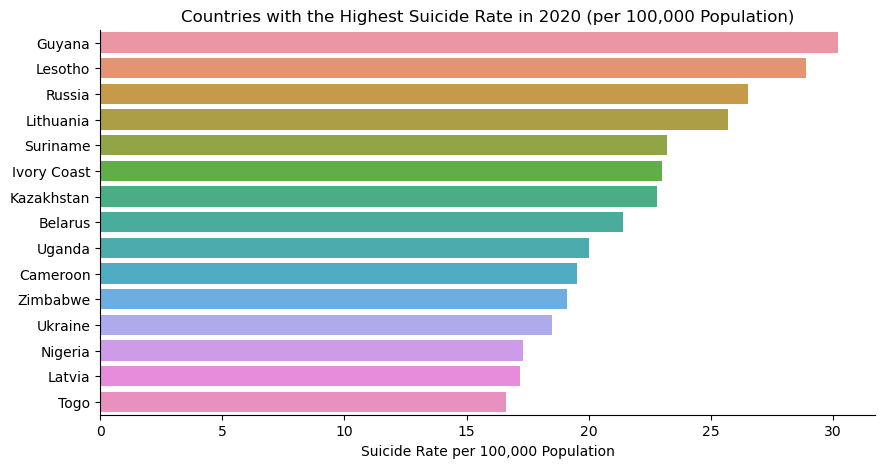

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Suicide rate',data=top_suicide)
plt.xlabel('Suicide Rate per 100,000 Population')
plt.title('Countries with the Highest Suicide Rate in 2020 (per 100,000 Population)')
plt.ylabel('')
sns.despine()
plt.show()

Based on the data presented in the graph, the countries with the highest suicide rates per 100,000 people in 2020 are listed. Guyana recorded the highest suicide rate with 30.2 suicides per 100,000 people, followed by Lesotho with 28.9 suicides per 100,000 people. Among the 15 countries in the list, 2 are located in South America, 7 are in Africa, 5 are in Europe, and 1 is in Asia.

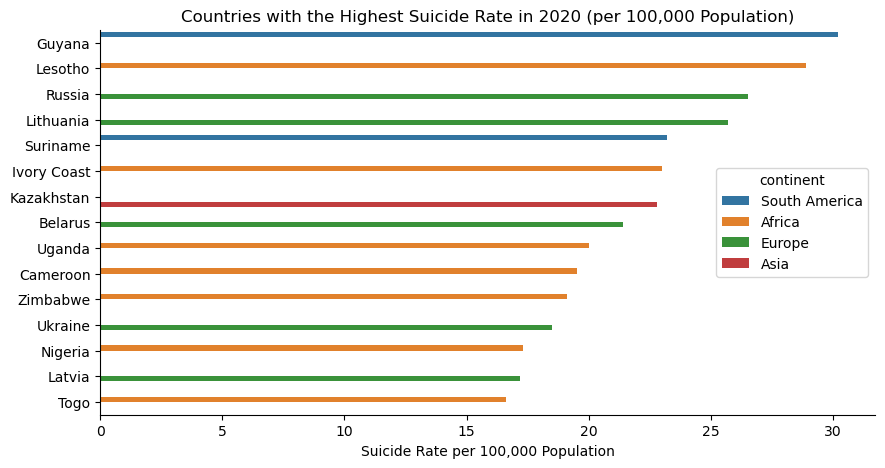

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Suicide rate',data=top_suicide,hue='continent')
plt.xlabel('Suicide Rate per 100,000 Population')
plt.title('Countries with the Highest Suicide Rate in 2020 (per 100,000 Population)')
plt.ylabel('')
sns.despine()
plt.show()

In [69]:
world.loc[world['Country'] == 'Trinidad and Tobago', 'continent'] = 'South America' 

In [70]:
world.loc[world['Country'] == 'The Bahamas', 'continent'] = 'North America' 

In [71]:
low_suicide =world.sort_values(by='Suicide rate',ascending=True)[['Country','Suicide rate','continent']].head(15)
low_suicide

,Country,Suicide rate,continent
11,Barbados,0.4,North America
3,Antigua and Barbuda,0.5,North America
654,The Bahamas,1.6,North America
59,Grenada,1.7,North America
586,Jamaica,2.0,North America
8,Azerbaijan,2.6,Asia
663,United Arab Emirates,2.7,Asia
60,Guatemala,2.9,North America
623,Pakistan,3.1,Asia
611,Morocco,3.1,Africa


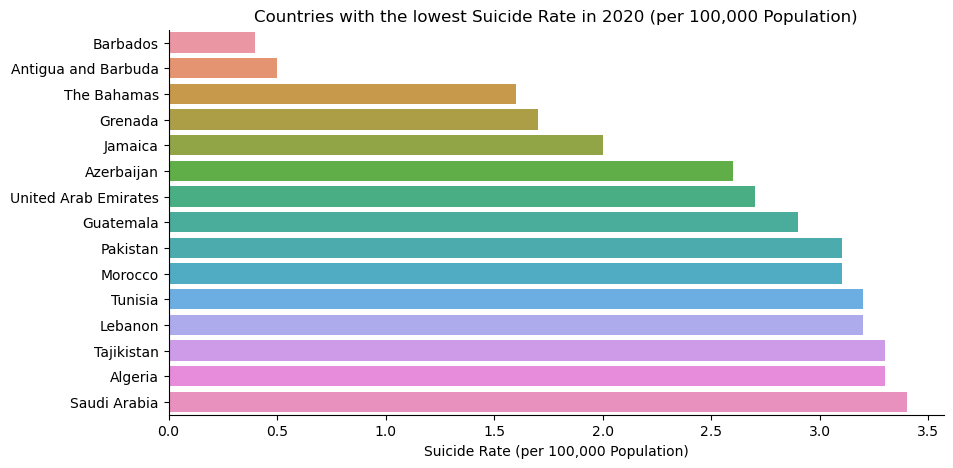

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Suicide rate',data=low_suicide)
plt.xlabel('Suicide Rate (per 100,000 Population)')
plt.title('Countries with the lowest Suicide Rate in 2020 (per 100,000 Population)')
plt.ylabel('')
sns.despine()
plt.show()

The graph displays the top 15 countries with the lowest suicide rates in 2020. Barbados had the lowest suicide rate at 0.4 suicides per 100,000 people, followed by Antigua and Barbuda in second place with 0.5 suicides per 100,000 people. Out of the 15 countries in the list, 6 are located in North America, 6 are in Asia, and 3 are in Africa.

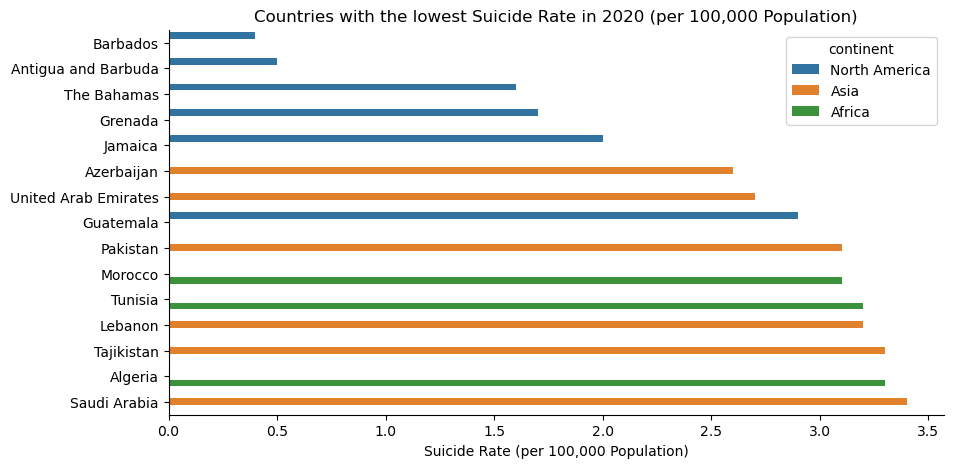

In [73]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Suicide rate',data=low_suicide,hue='continent')
plt.xlabel('Suicide Rate (per 100,000 Population)')
plt.title('Countries with the lowest Suicide Rate in 2020 (per 100,000 Population)')
plt.ylabel('')
sns.despine()
plt.show()

In [74]:
world.head()

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,continent,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio,Urbanization rate,Suicide rate
0,0,0,Afghanistan,4.5,Asia,2182.0,64.5,17.3,2.41,27.4,1.03,26.0,6.4
1,2,2,Algeria,3.0,Africa,16091.0,76.7,18.3,1.89,28.1,1.03,73.7,3.3
2,4,4,Angola,5.5,Africa,6763.0,60.8,19.0,3.12,15.9,0.95,66.8,8.9
3,5,5,Antigua and Barbuda,2.0,North America,30593.0,76.9,56.0,1.03,31.9,0.89,24.4,0.5
4,6,6,Argentina,2.3,South America,19971.0,76.5,79.7,0.88,31.7,0.98,92.1,9.1


In [75]:
top_gdp = world.sort_values(by='GDP per capita',ascending=False)[['Country','GDP per capita','continent']].head(15)
top_gdp

,Country,GDP per capita,continent
600,Luxembourg,112045.0,Europe
640,Singapore,105689.0,Asia
582,Ireland,86988.0,Europe
621,Norway,79638.0,Europe
663,United Arab Emirates,70441.0,Asia
665,United States,67426.0,North America
615,Netherlands,60299.0,Europe
577,Iceland,56974.0,Europe
636,Saudi Arabia,56912.0,Asia
650,Sweden,55989.0,Europe


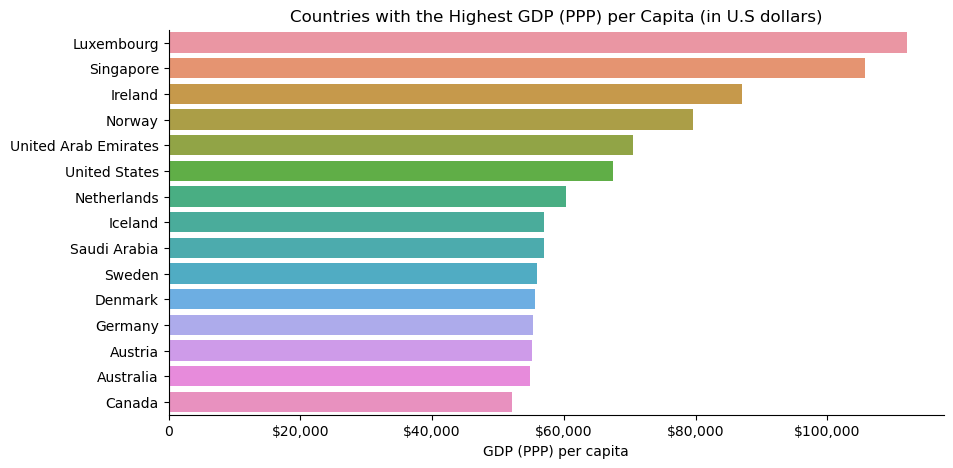

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='GDP per capita',data=top_gdp)
plt.xlabel('GDP (PPP) per capita')
plt.title('Countries with the Highest GDP (PPP) per Capita (in U.S dollars)')
plt.ylabel('')
plt.xticks([0,20000,40000,60000,80000,100000],['0','$20,000','$40,000','$60,000','$80,000','$100,000'])
sns.despine()
plt.show()

This graph displays the top 15 countries with the highest GDP per capita in 2020, adjusted for purchasing power parity, which takes into account living costs and inflation rates. Luxembourg has the highest GDP per capita, with a value of around 112,000 USD. Singapore ranks second, with a value of around 105,000 USD. Of the 15 countries on the list, 9 are European, 3 are Asian, 2 are North American, and 1 is Oceanian.

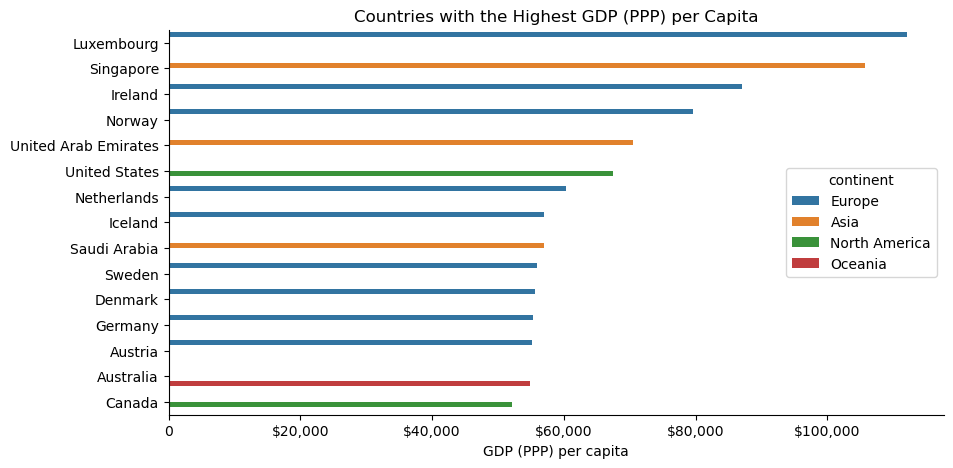

In [77]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='GDP per capita',data=top_gdp,hue='continent')
plt.xlabel('GDP (PPP) per capita')
plt.title('Countries with the Highest GDP (PPP) per Capita')
plt.ylabel('')
sns.despine()
plt.xticks([0,20000,40000,60000,80000,100000],['0','$20,000','$40,000','$60,000','$80,000','$100,000'])
plt.show()

In [78]:
low_gdp = world.sort_values(by='GDP per capita',ascending=True)[['Country','GDP per capita','continent']].head(15)
low_gdp

,Country,GDP per capita,continent
643,Somalia,314.5,Africa
23,Burundi,724.0,Africa
28,Central African Republic,864.0,Africa
39,Democratic Republic of the Congo,873.0,Africa
47,Eritrea,1103.0,Africa
618,Niger,1152.0,Africa
602,Malawi,1292.0,Africa
612,Mozambique,1372.0,Africa
597,Liberia,1428.0,Africa
645,South Sudan,1715.0,Africa


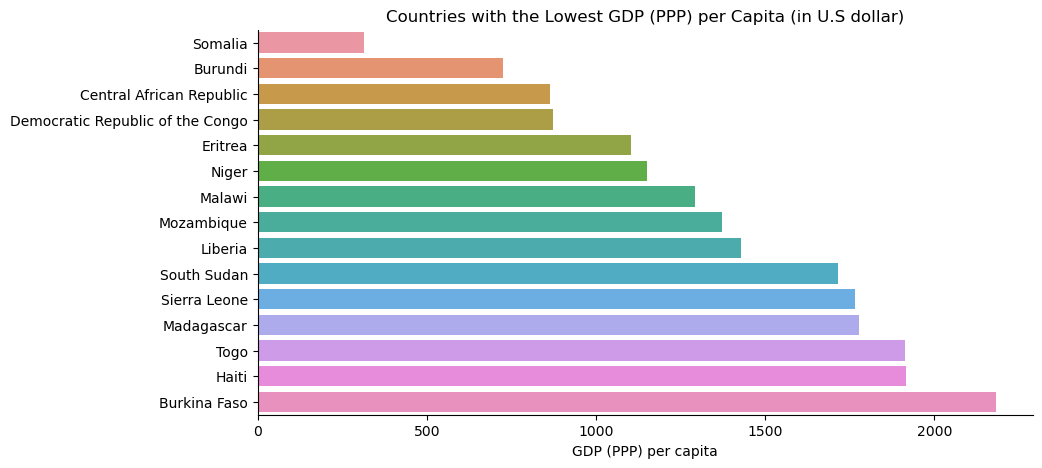

In [79]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='GDP per capita',data=low_gdp)
plt.xlabel('GDP (PPP) per capita')
plt.title('Countries with the Lowest GDP (PPP) per Capita (in U.S dollar)')
plt.ylabel('')

sns.despine()
plt.show()

This graph illustrates the top 15 countries with the lowest GDP per capita in 2020. Somalia had the lowest GDP per capita, with a value of around 314 USD, followed closely by Burundi at 724 USD. Of the 15 countries on the list, 14 are African and 1 is North American.

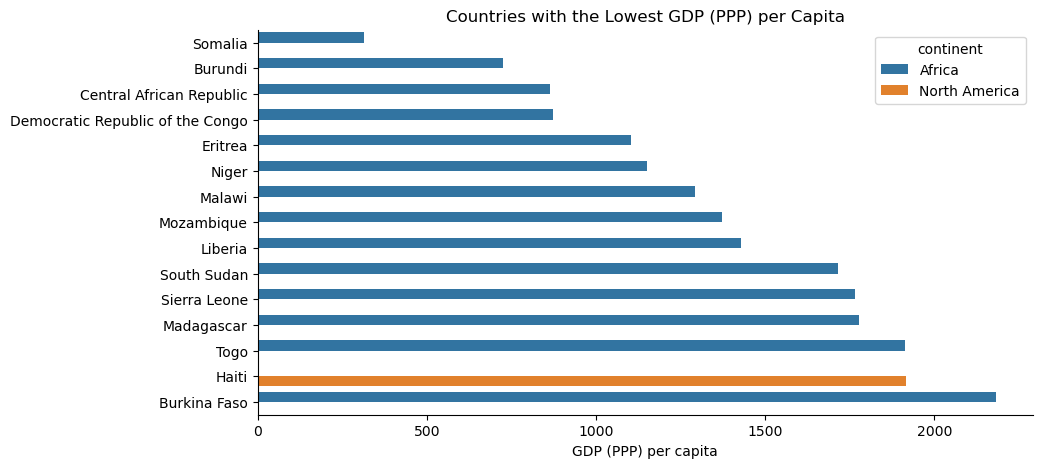

In [80]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='GDP per capita',data=low_gdp,hue='continent')
plt.xlabel('GDP (PPP) per capita')
plt.title('Countries with the Lowest GDP (PPP) per Capita')
plt.ylabel('')

sns.despine()
plt.show()

In [81]:
world.head()

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,continent,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio,Urbanization rate,Suicide rate
0,0,0,Afghanistan,4.5,Asia,2182.0,64.5,17.3,2.41,27.4,1.03,26.0,6.4
1,2,2,Algeria,3.0,Africa,16091.0,76.7,18.3,1.89,28.1,1.03,73.7,3.3
2,4,4,Angola,5.5,Africa,6763.0,60.8,19.0,3.12,15.9,0.95,66.8,8.9
3,5,5,Antigua and Barbuda,2.0,North America,30593.0,76.9,56.0,1.03,31.9,0.89,24.4,0.5
4,6,6,Argentina,2.3,South America,19971.0,76.5,79.7,0.88,31.7,0.98,92.1,9.1


In [82]:
high_age = world.sort_values(by='Median age',ascending=False)[['Country','Median age','continent']].head(15)
high_age

,Country,Median age,continent
587,Japan,47.3,Asia
55,Germany,47.1,Europe
584,Italy,45.5,Europe
57,Greece,44.5,Europe
641,Slovenia,44.5,Europe
7,Austria,44.0,Europe
599,Lithuania,43.7,Europe
594,Latvia,43.6,Europe
35,Croatia,43.0,Europe
48,Estonia,42.7,Europe


In [83]:
low_age = world.sort_values(by='Median age',ascending=True)[['Country','Median age','continent']].head(15)
low_age

,Country,Median age,continent
618,Niger,15.4,Africa
604,Mali,15.8,Africa
661,Uganda,15.8,Africa
2,Angola,15.9,Africa
602,Malawi,16.5,Africa
672,Zambia,16.8,Africa
23,Burundi,17.0,Africa
612,Mozambique,17.2,Africa
22,Burkina Faso,17.3,Africa
645,South Sudan,17.3,Africa


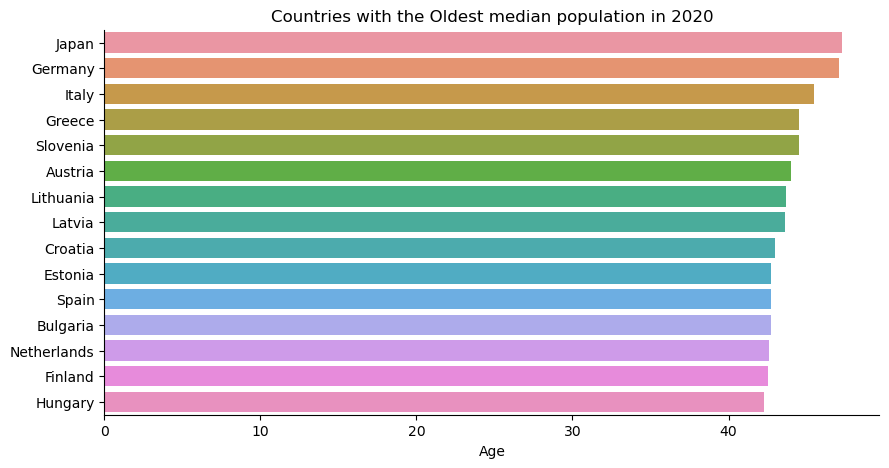

In [84]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Median age',data=high_age)
plt.xlabel('Age')
plt.title('Countries with the Oldest median population in 2020')
plt.ylabel('')

sns.despine()
plt.show()

This graph depicts the top 15 countries with the highest median age in 2020. Japan has the highest median age population, with a value of 47.3 years, followed by Germany at 47.1 years. Of the 15 countries on the list, 14 are European and 1 is Asian. Europe has the highest median age population.

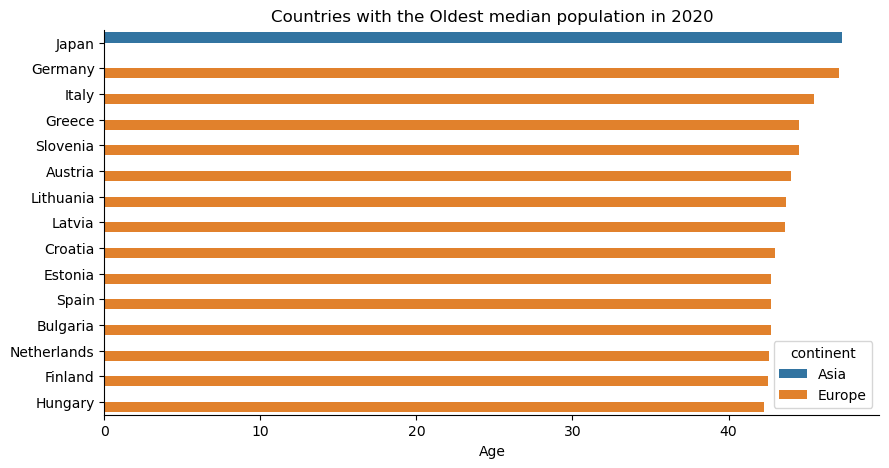

In [85]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Median age',data=high_age,hue='continent')
plt.xlabel('Age')
plt.title('Countries with the Oldest median population in 2020')
plt.ylabel('')

sns.despine()
plt.show()

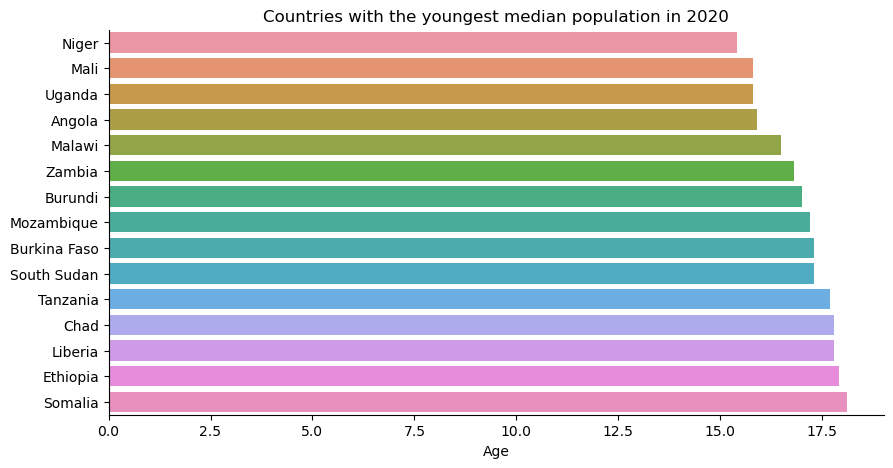

In [86]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Median age',data=low_age)
plt.xlabel('Age')
plt.title('Countries with the youngest median population in 2020')
plt.ylabel('')

sns.despine()
plt.show()

This graph illustrates the top 15 countries with the youngest median age population in 2020. Niger has the youngest population in the world with a median age of 15.4 years. Mali comes in close second at 15.8 years. All countries in the list are African countries. Africa is home to the youngest population in the world. 

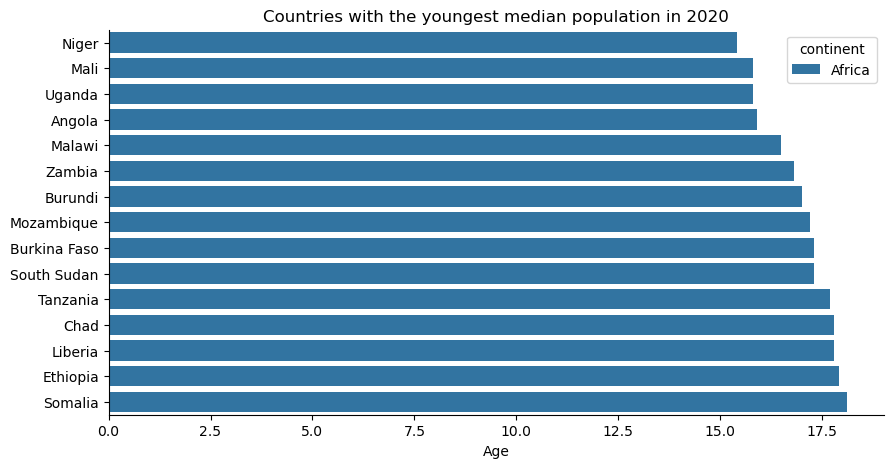

In [87]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Median age',data=low_age,hue='continent')
plt.xlabel('Age')
plt.title('Countries with the youngest median population in 2020')
plt.ylabel('')

sns.despine()
plt.show()

In [88]:
world.head()

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,continent,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio,Urbanization rate,Suicide rate
0,0,0,Afghanistan,4.5,Asia,2182.0,64.5,17.3,2.41,27.4,1.03,26.0,6.4
1,2,2,Algeria,3.0,Africa,16091.0,76.7,18.3,1.89,28.1,1.03,73.7,3.3
2,4,4,Angola,5.5,Africa,6763.0,60.8,19.0,3.12,15.9,0.95,66.8,8.9
3,5,5,Antigua and Barbuda,2.0,North America,30593.0,76.9,56.0,1.03,31.9,0.89,24.4,0.5
4,6,6,Argentina,2.3,South America,19971.0,76.5,79.7,0.88,31.7,0.98,92.1,9.1


In [89]:
sex_high_male = world.sort_values(by='Sex-ratio',ascending=False)[['Country','Sex-ratio','continent']].head(15)
sex_high_male

,Country,Sex-ratio,continent
663,United Arab Emirates,2.56,Asia
9,Bahrain,1.53,Asia
636,Saudi Arabia,1.30,Asia
622,Oman,1.18,Asia
588,Jordan,1.11,Asia
578,India,1.08,Asia
58,Greenland,1.08,North America
16,Bhutan,1.08,Asia
53,Gabon,1.08,Africa
638,Seychelles,1.07,Africa


In [90]:
sex_high_female = world.sort_values(by='Sex-ratio',ascending=True)[['Country','Sex-ratio','continent']].head(15)
sex_high_female

,Country,Sex-ratio,continent
41,Djibouti,0.83,Africa
594,Latvia,0.86,Europe
633,Russia,0.86,Europe
662,Ukraine,0.86,Europe
599,Lithuania,0.86,Europe
12,Belarus,0.87,Europe
48,Estonia,0.88,Europe
3,Antigua and Barbuda,0.89,North America
630,Portugal,0.90,Europe
576,Hungary,0.91,Europe


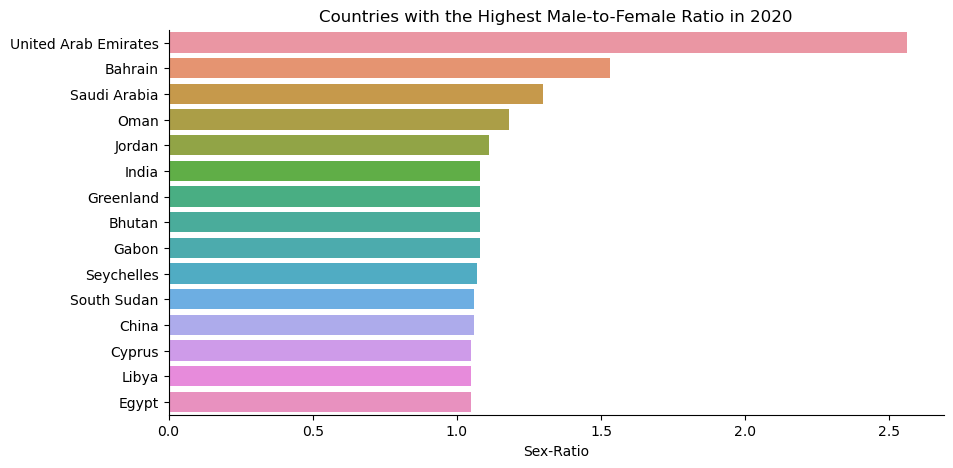

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Sex-ratio',data=sex_high_male)
plt.xlabel('Sex-Ratio')
plt.title('Countries with the Highest Male-to-Female Ratio in 2020')
plt.ylabel('')

sns.despine()
plt.show()

This graph depicts the top 15 countries with the highest male-to-female ratio in 2020. The United Arab Emirates had the highest male-to-female ratio at 2.56, meaning there were 2.56 males for every female. Bahrain came in second with 1.53 males for every female. Nine of the 15 countries were Asian, five were African, and one was North American. It appears that Asian countries tend to have more males than females.

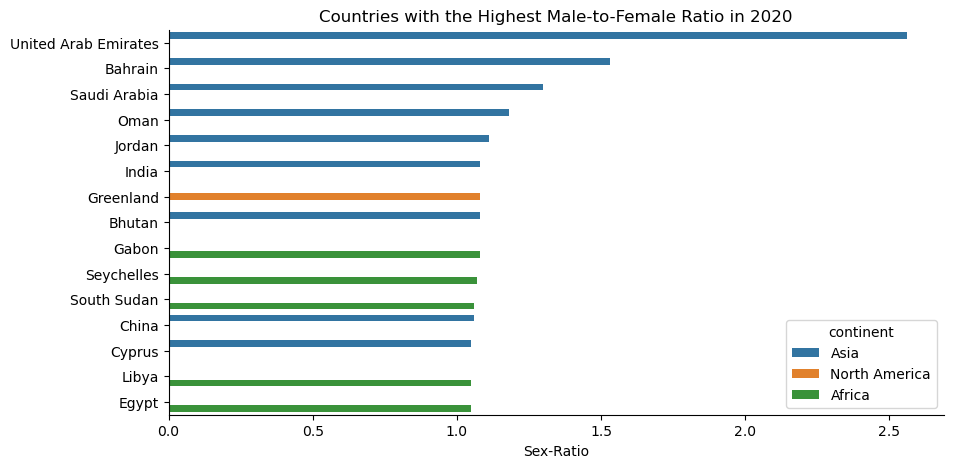

In [92]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Sex-ratio',data=sex_high_male,hue='continent')
plt.xlabel('Sex-Ratio')
plt.title('Countries with the Highest Male-to-Female Ratio in 2020')
plt.ylabel('')

sns.despine()
plt.show()

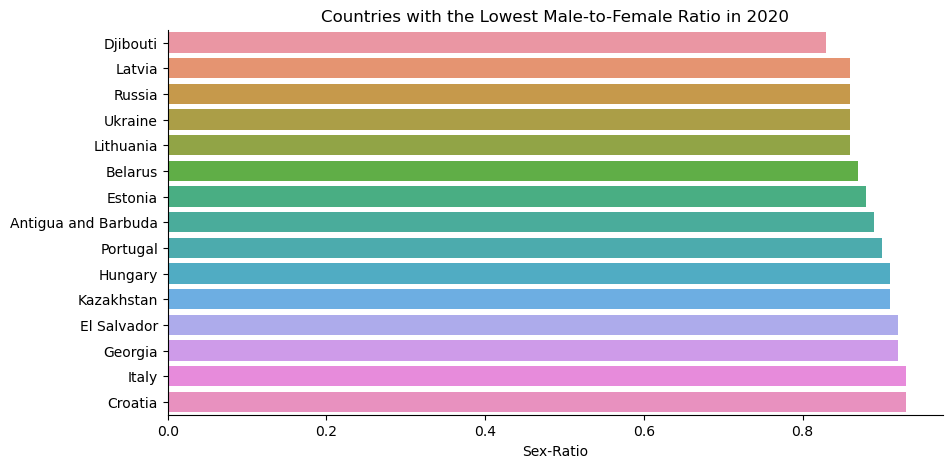

In [93]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Sex-ratio',data=sex_high_female)
plt.xlabel('Sex-Ratio')
plt.title('Countries with the Lowest Male-to-Female Ratio in 2020')
plt.ylabel('')

sns.despine()
plt.show()

The graph shows the 15 countries with the smallest male-to-female ratio in 2020. At the top of the list is Djibouti, with a ratio of only 0.83 males for every 1 female. Latvia follows closely behind, with a ratio of 0.86. The countries on the list are predominantly from Europe, with 10 countries in total, while Asia and North America are represented by 2 countries each. Only 1 African country made it to the list.

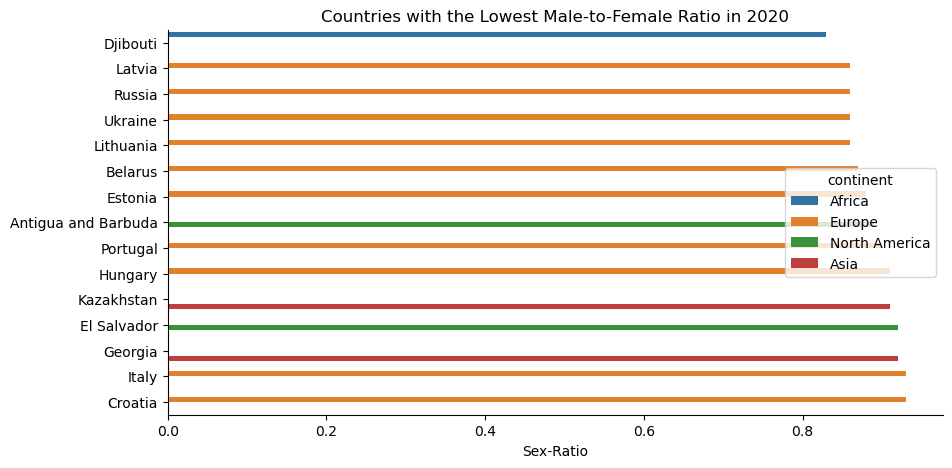

In [94]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Sex-ratio',data=sex_high_female,hue='continent')
plt.xlabel('Sex-Ratio')
plt.title('Countries with the Lowest Male-to-Female Ratio in 2020')
plt.ylabel('')

sns.despine()
plt.show()

In [95]:
world.head()

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,continent,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio,Urbanization rate,Suicide rate
0,0,0,Afghanistan,4.5,Asia,2182.0,64.5,17.3,2.41,27.4,1.03,26.0,6.4
1,2,2,Algeria,3.0,Africa,16091.0,76.7,18.3,1.89,28.1,1.03,73.7,3.3
2,4,4,Angola,5.5,Africa,6763.0,60.8,19.0,3.12,15.9,0.95,66.8,8.9
3,5,5,Antigua and Barbuda,2.0,North America,30593.0,76.9,56.0,1.03,31.9,0.89,24.4,0.5
4,6,6,Argentina,2.3,South America,19971.0,76.5,79.7,0.88,31.7,0.98,92.1,9.1


In [96]:
top_life = world.sort_values(by='Life expectancy',ascending=False)[['Country','Life expectancy','continent']].head(15)
top_life 

,Country,Life expectancy,continent
587,Japan,84.5,Asia
640,Singapore,83.8,Asia
584,Italy,83.6,Europe
646,Spain,83.4,Europe
6,Australia,83.3,Oceania
577,Iceland,82.9,Europe
583,Israel,82.8,Asia
650,Sweden,82.7,Europe
621,Norway,82.5,Europe
52,France,82.5,Europe


In [97]:
low_life = world.sort_values(by='Life expectancy',ascending=True)[['Country','Life expectancy','continent']].head(15)
low_life 

,Country,Life expectancy,continent
28,Central African Republic,52.8,Africa
596,Lesotho,53.7,Africa
29,Chad,54.0,Africa
639,Sierra Leone,54.3,Africa
619,Nigeria,54.3,Africa
643,Somalia,56.7,Africa
585,Ivory Coast,57.4,Africa
645,South Sudan,57.6,Africa
25,Cameroon,58.9,Africa
604,Mali,58.9,Africa


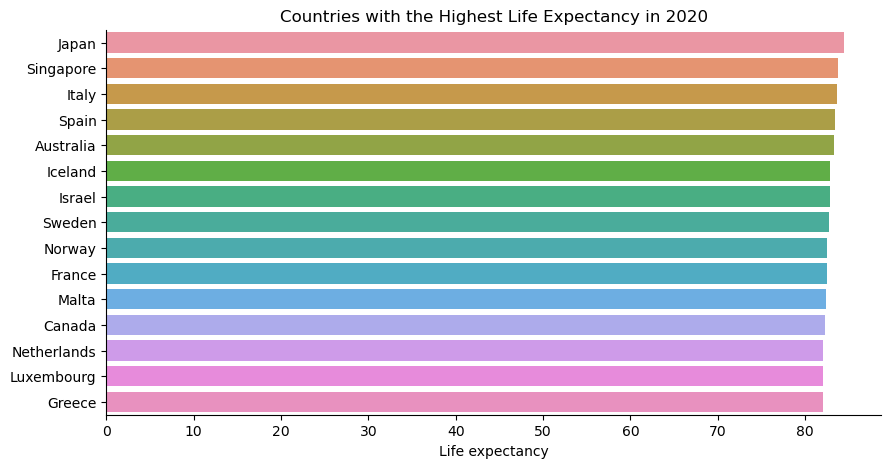

In [98]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Life expectancy',data=top_life)
plt.xlabel('Life expectancy')
plt.title('Countries with the Highest Life Expectancy in 2020')
plt.ylabel('')

sns.despine()
plt.show()

This graph displays the top 15 countries with the highest life expectancy in 2020. Japan takes the first spot with a life expectancy of 84.5 years. The list comprises 10 European countries, 3 Asian countries, one Oceanian country, and one North American country.

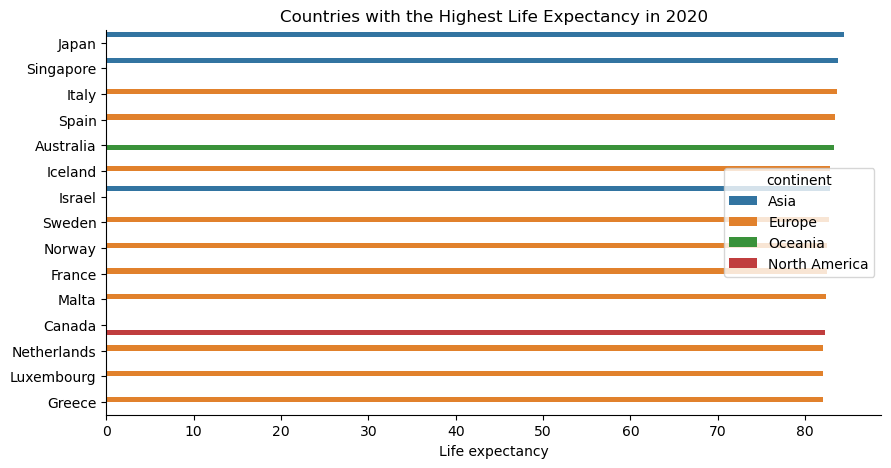

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Life expectancy',data=top_life,hue='continent')
plt.xlabel('Life expectancy')
plt.title('Countries with the Highest Life Expectancy in 2020')
plt.ylabel('')

sns.despine()
plt.show()

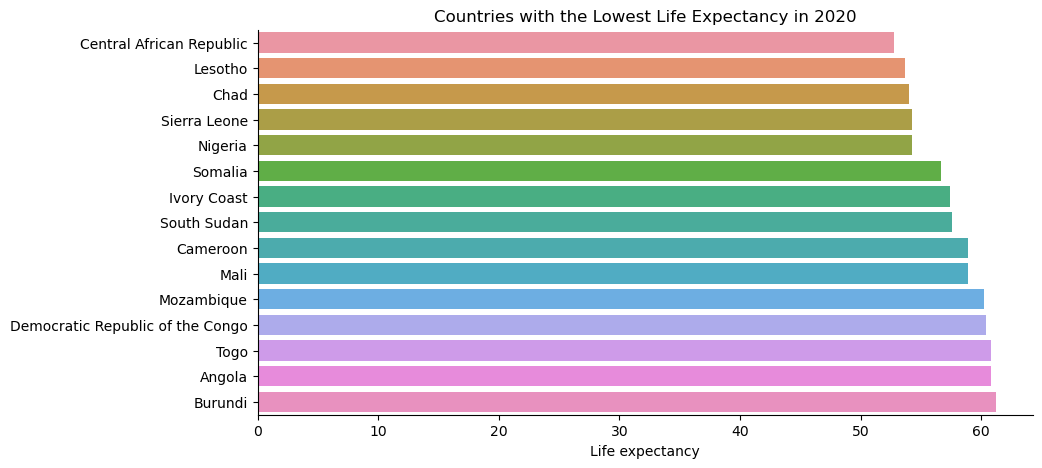

In [100]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Life expectancy',data=low_life)
plt.xlabel('Life expectancy')
plt.title('Countries with the Lowest Life Expectancy in 2020')
plt.ylabel('')

sns.despine()
plt.show()

The graph shows the top 15 countries with the lowest life expectancy in 2020. The Central African Republic has the lowest life expectancy rate at 52.8 years, and all the countries in the list are African countries. This indicates that people in Africa have a significantly shorter life expectancy compared to other parts of the world.

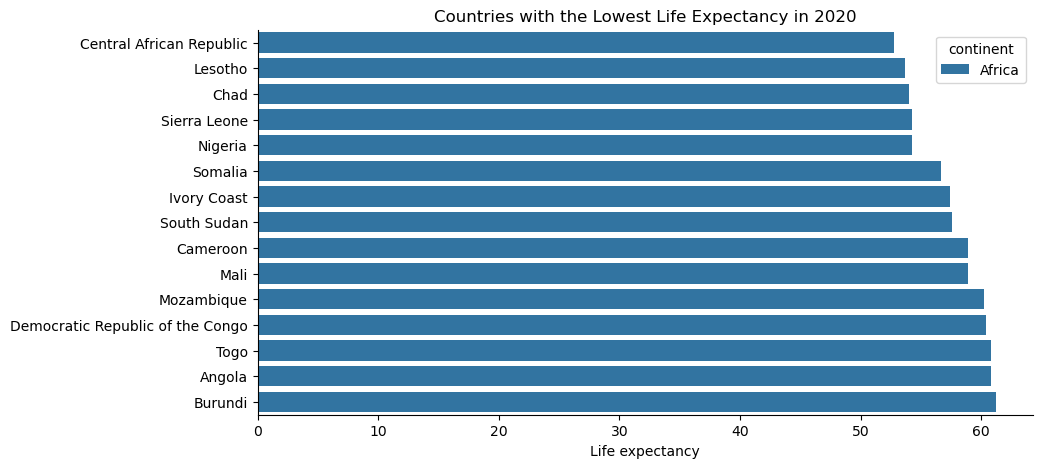

In [101]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Life expectancy',data=low_life,hue='continent')
plt.xlabel('Life expectancy')
plt.title('Countries with the Lowest Life Expectancy in 2020')
plt.ylabel('')

sns.despine()
plt.show()

In [102]:
world[world['Country']=='Guinea']

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,continent,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio,Urbanization rate,Suicide rate
61,73,73,Guinea,4.7,Africa,2574.0,61.2,6.5,2.56,20.1,1.0,44.2,10.5


In [103]:
world.loc[world['Country']=='The Bahamas','continent'] == 'North America'

654    True
Name: continent, dtype: bool

In [104]:
world.drop_duplicates(subset= ['Country'],keep='first',inplace=True)

In [105]:
world.head()

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,continent,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio,Urbanization rate,Suicide rate
0,0,0,Afghanistan,4.5,Asia,2182.0,64.5,17.3,2.41,27.4,1.03,26.0,6.4
1,2,2,Algeria,3.0,Africa,16091.0,76.7,18.3,1.89,28.1,1.03,73.7,3.3
2,4,4,Angola,5.5,Africa,6763.0,60.8,19.0,3.12,15.9,0.95,66.8,8.9
3,5,5,Antigua and Barbuda,2.0,North America,30593.0,76.9,56.0,1.03,31.9,0.89,24.4,0.5
4,6,6,Argentina,2.3,South America,19971.0,76.5,79.7,0.88,31.7,0.98,92.1,9.1


In [106]:
high_meat =world.sort_values(by='Meat consumption',ascending=False)[['Country','Meat consumption','continent']].head(15)
high_meat

,Country,Meat consumption,continent
40,Denmark,145.9,Europe
616,New Zealand,142.1,Oceania
600,Luxembourg,141.7,Europe
37,Cyprus,131.3,Asia
665,United States,124.8,North America
654,The Bahamas,123.6,North America
646,Spain,118.6,Europe
610,Mongolia,108.8,Asia
6,Australia,108.2,Oceania
26,Canada,108.1,North America


In [107]:
low_meat =world.sort_values(by='Meat consumption',ascending=True)[['Country','Meat consumption','continent']].head(15)
low_meat

,Country,Meat consumption,continent
16,Bhutan,3.0,Asia
10,Bangladesh,3.1,Asia
23,Burundi,3.5,Africa
635,Rwanda,4.4,Africa
39,Democratic Republic of the Congo,4.8,Africa
602,Malawi,5.1,Africa
655,Africa,5.2,None
578,India,5.2,Asia
612,Mozambique,5.6,Africa
639,Sierra Leone,6.1,Africa


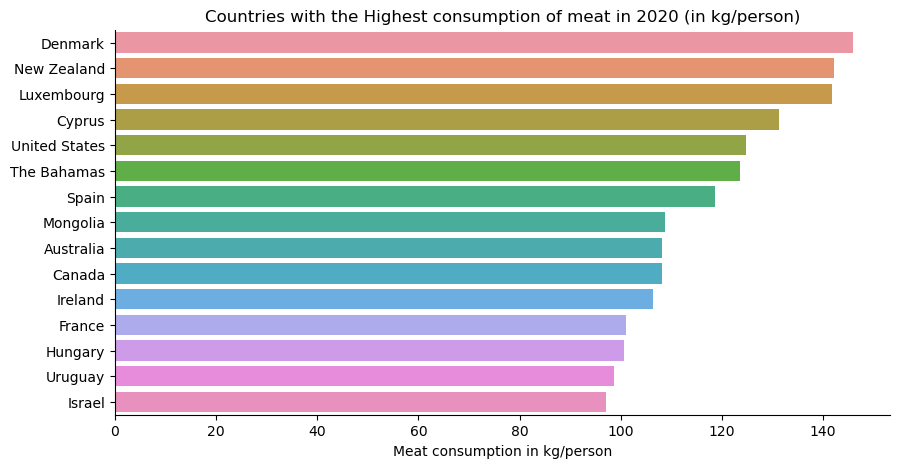

In [108]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Meat consumption',data=high_meat)
plt.xlabel('Meat consumption in kg/person')
plt.title('Countries with the Highest consumption of meat in 2020 (in kg/person)')
plt.ylabel('')

sns.despine()
plt.show()

The graph illustrates the top 15 countries that had the highest meat consumption per capita in 2020. Denmark ranked first with an average consumption of 145.9 kilograms of meat per person. The list includes six European countries, three North American countries, two Oceanian countries, three Asian countries, and one South American country.

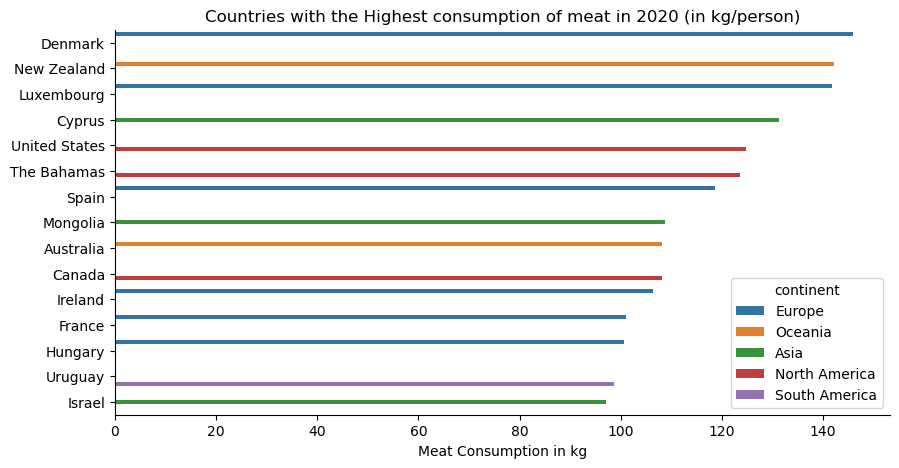

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Meat consumption',data=high_meat,hue='continent')
plt.xlabel('Meat Consumption in kg')
plt.title('Countries with the Highest consumption of meat in 2020 (in kg/person)')
plt.ylabel('')

sns.despine()
plt.show()

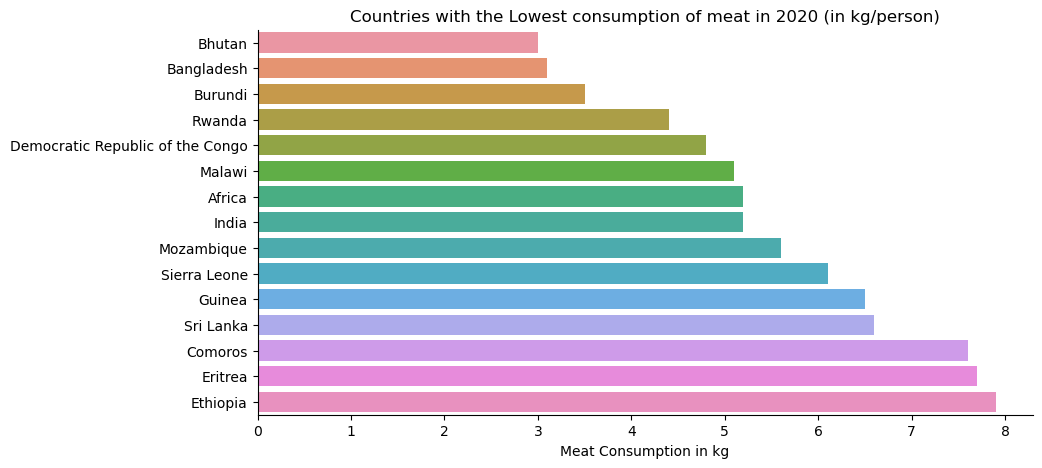

In [110]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Meat consumption',data=low_meat)
plt.xlabel('Meat Consumption in kg')
plt.title('Countries with the Lowest consumption of meat in 2020 (in kg/person)')
plt.ylabel('')

sns.despine()
plt.show()

The graph shows the 15 countries with the lowest meat consumption per person in 2020. Bhutan had the lowest meat consumption at just 3kg per person. The list is dominated by 11 African countries and 4 Asian countries. It appears that countries with lower income tend to have lower meat consumption, likely due to the higher cost of meat.

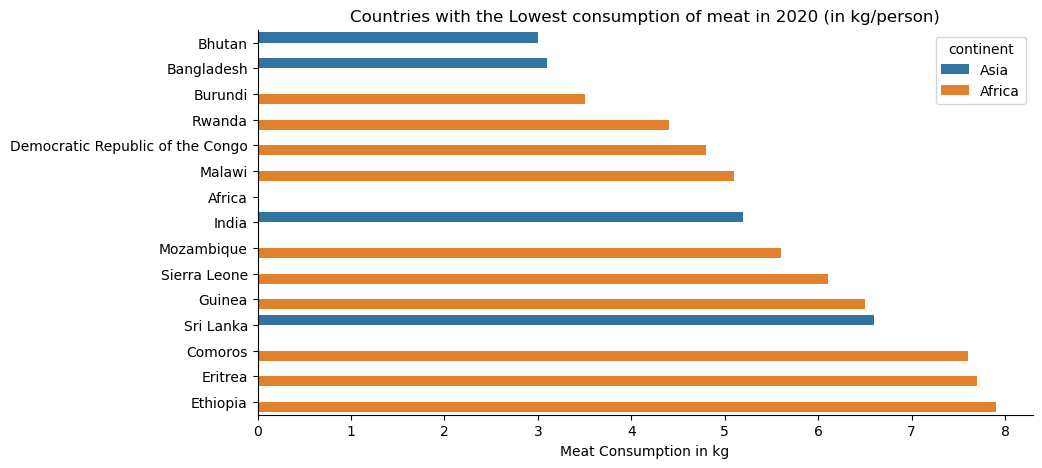

In [111]:
plt.figure(figsize=(10,5))
sns.barplot(y='Country',x='Meat consumption',data=low_meat,hue='continent')
plt.xlabel('Meat Consumption in kg')
plt.title('Countries with the Lowest consumption of meat in 2020 (in kg/person)')
plt.ylabel('')

sns.despine()
plt.show()

In [112]:
world.head()

,Unnamed: 0.1,Unnamed: 0,Country,Fertility,continent,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio,Urbanization rate,Suicide rate
0,0,0,Afghanistan,4.5,Asia,2182.0,64.5,17.3,2.41,27.4,1.03,26.0,6.4
1,2,2,Algeria,3.0,Africa,16091.0,76.7,18.3,1.89,28.1,1.03,73.7,3.3
2,4,4,Angola,5.5,Africa,6763.0,60.8,19.0,3.12,15.9,0.95,66.8,8.9
3,5,5,Antigua and Barbuda,2.0,North America,30593.0,76.9,56.0,1.03,31.9,0.89,24.4,0.5
4,6,6,Argentina,2.3,South America,19971.0,76.5,79.7,0.88,31.7,0.98,92.1,9.1


# Relationship between Variables 

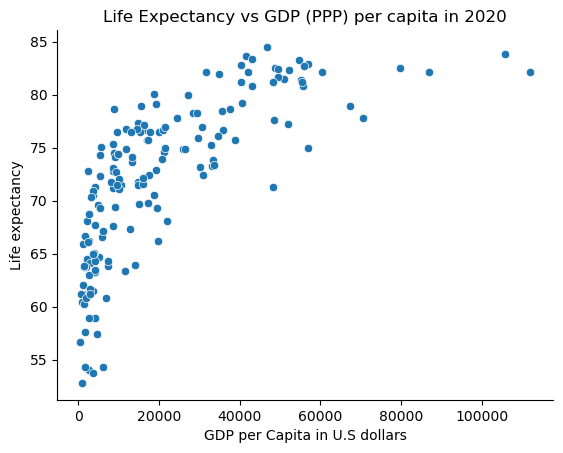

In [346]:
sns.scatterplot(x='GDP per capita',y='Life expectancy',data=world)
plt.title('Life Expectancy vs GDP (PPP) per capita in 2020')
plt.xlabel('GDP per Capita in U.S dollars')
sns.despine()

The graph displays the correlation between GDP per capita and Life expectancy in 2020, indicating a strong positive relationship between the two variables with a correlation coefficient of 0.72. Generally, countries with a higher GDP per capita tend to have a higher life expectancy than those with a lower GDP per capita.

In [347]:
world['GDP per capita'].corr(world['Life expectancy'])

0.7246369888779298

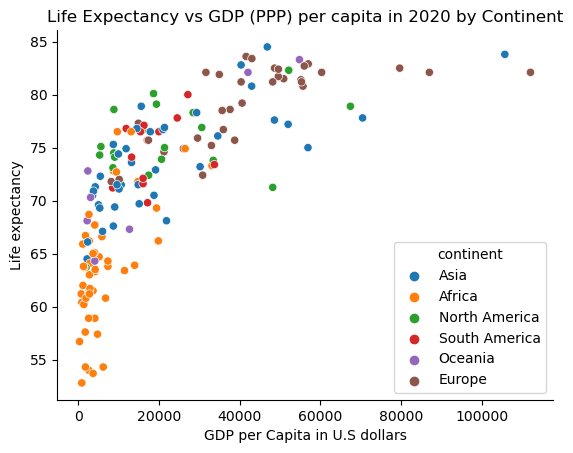

In [348]:
sns.scatterplot(x='GDP per capita',y='Life expectancy',data=world,hue='continent')
plt.title('Life Expectancy vs GDP (PPP) per capita in 2020 by Continent')
plt.xlabel('GDP per Capita in U.S dollars')
sns.despine()

Additionally, Asian countries have a moderate to high GDP per capita with a moderate to high life expectancy. Some North American countries have a high GDP per capita and a high life expectancy, while Oceanian countries have a high life expectancy and a moderate GDP per capita. The graph illustrates the strong correlation between GDP per capita and life expectancy across all continents.

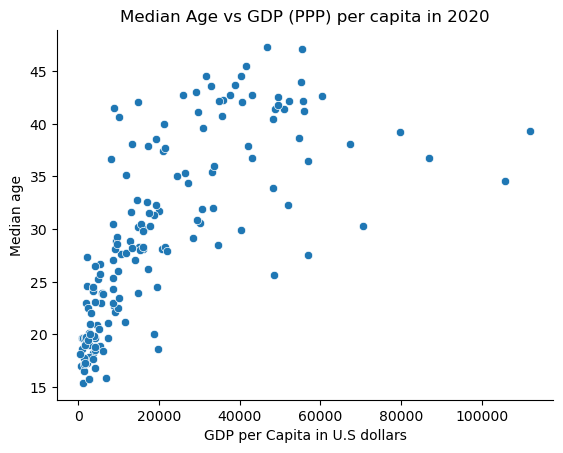

In [349]:
sns.scatterplot(x='GDP per capita',y='Median age',data=world)
plt.title('Median Age vs GDP (PPP) per capita in 2020')
plt.xlabel('GDP per Capita in U.S dollars')
sns.despine()

The graph demonstrates that as the average GDP per capita increases, the median age of the population also tends to increase. This suggests that there may be a correlation between a country's level of economic development and the age structure of its population. Countries with higher GDP per capita may have a greater capacity to invest in healthcare, education, and other social services, which can contribute to longer life expectancies and an older population.

In [350]:
world['GDP per capita'].corr(world['Median age'])

0.7000056240110555

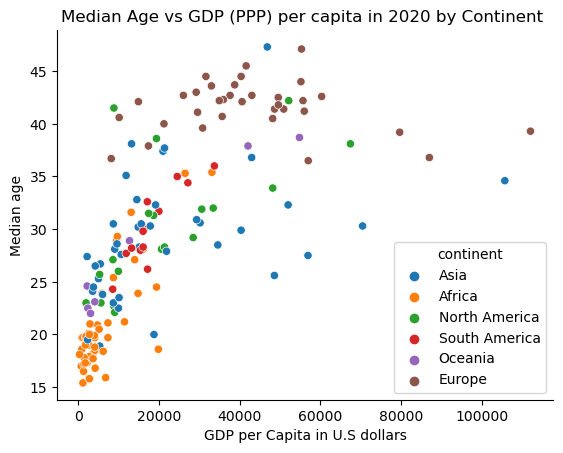

In [351]:
sns.scatterplot(x='GDP per capita',y='Median age',data=world,hue='continent')
plt.title('Median Age vs GDP (PPP) per capita in 2020 by Continent ')
plt.xlabel('GDP per Capita in U.S dollars')
sns.despine()

It's worth noting that while African countries generally have a younger population and lower GDP per capita, there are some exceptions, such as South Africa which has a higher GDP per capita than other African countries and a median age of 28.9 years. Additionally, while European countries generally have an older population and higher GDP per capita, there are some countries in Europe, such as Ukraine and Moldova, that have a lower GDP per capita and younger population.

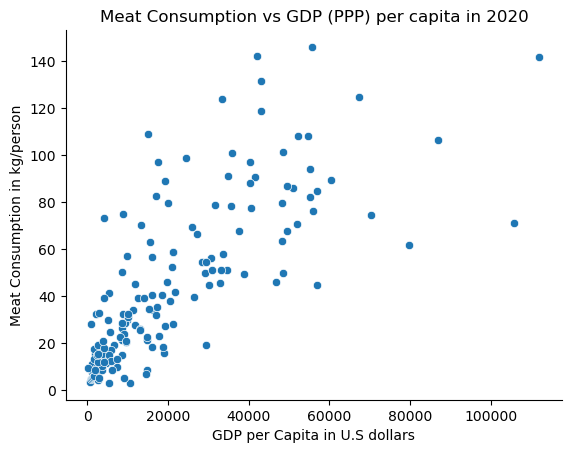

In [352]:
sns.scatterplot(x='GDP per capita',y='Meat consumption',data=world)
plt.title('Meat Consumption vs GDP (PPP) per capita in 2020')
plt.xlabel('GDP per Capita in U.S dollars')
plt.ylabel('Meat Consumption in kg/person')
sns.despine()

In this graph, we can see that wealthier countries (with relatively high average GDP per capita) consume more meat per person than countries with a low average GDP per person. The correlation coefficient is 0.75, which indicates a strong positive relationship. People with a lower income can't afford to much meat and peopel wiht a higher income tend to consume more meat than they need.However, it's important to note that there could be other factors at play as well, such as cultural differences or availability of meat products in different regions

In [353]:
world['GDP per capita'].corr(world['Meat consumption'])

0.7572971842389984

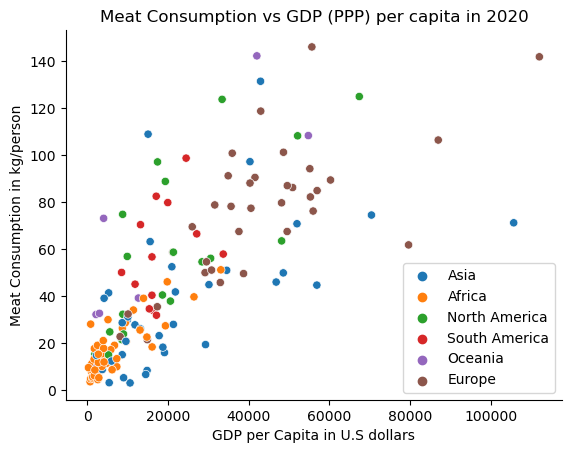

In [354]:
sns.scatterplot(x='GDP per capita',y='Meat consumption',data=world,hue='continent')
plt.title('Meat Consumption vs GDP (PPP) per capita in 2020')
plt.xlabel('GDP per Capita in U.S dollars')
plt.ylabel('Meat Consumption in kg/person')
plt.legend(loc='lower right')
sns.despine()

The graph illustrates the relationship between meat consumption and GDP per capita by continent in 2020. African countries had the lowest meat consumption and the lowest average GDP per capita. In contrast, European and North American countries had the highest meat consumption and a high average GDP per capita. This suggests that meat consumption is positively correlated with GDP per capita, and wealthier countries tend to consume more meat than economically disadvantaged countries. 

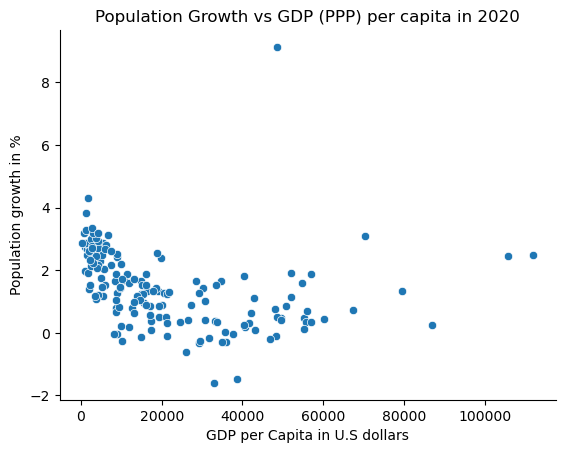

In [355]:
sns.scatterplot(x='GDP per capita',y='Population growth',data=world)
plt.title('Population Growth vs GDP (PPP) per capita in 2020')
plt.xlabel('GDP per Capita in U.S dollars')
plt.ylabel('Population growth in %')
sns.despine()

The graph illustrates the correlation between population growth rate and gdp per capita in 2020. It shows that countries with a higher gdp per capita tend to have a lower population growth rate. The two variables have a moderate negative correlation coefficient of -0.32.

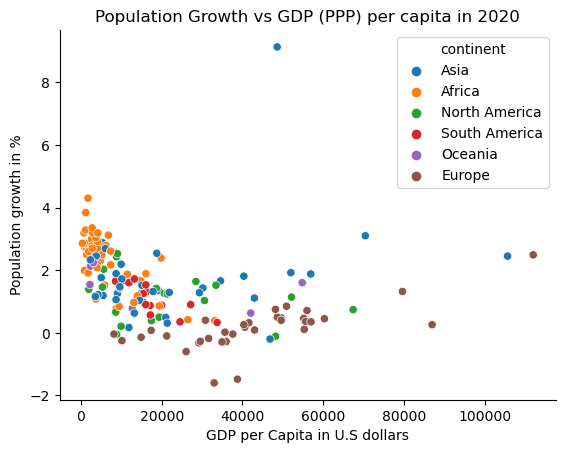

In [356]:
sns.scatterplot(x='GDP per capita',y='Population growth',data=world,hue='continent')
plt.title('Population Growth vs GDP (PPP) per capita in 2020')
plt.xlabel('GDP per Capita in U.S dollars')
plt.ylabel('Population growth in %')
sns.despine()

African countries recorded the highest population growth in 2020, but also have the lowest average gdp per capita. European countries have some of the lowest population growth in the world, but have a relatively high average gdp per capita. It seems that countries that are relatively wealthier have a lower population growth, possibly because the opportunity cost of staying home and raising children is higher.

In [357]:
world['GDP per capita'].corr(world['Population growth'])

-0.3191133111280833

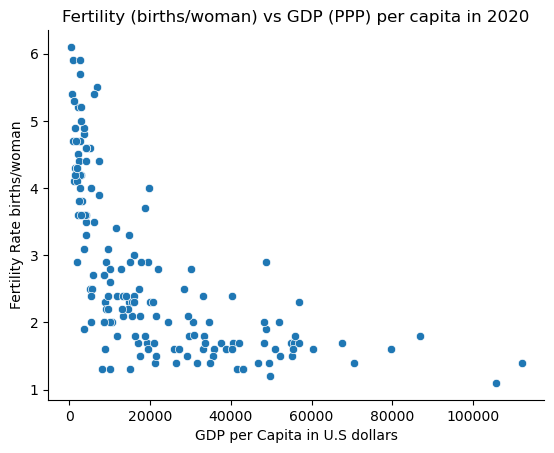

In [358]:
sns.scatterplot(x='GDP per capita',y='Fertility',data=world)
plt.title('Fertility (births/woman) vs GDP (PPP) per capita in 2020')
plt.xlabel('GDP per Capita in U.S dollars')
plt.ylabel('Fertility Rate births/woman')
sns.despine()

 The graph shows a moderate negative relationship of -0.63 between fertility rates and economic wealth in countries. In general, countries with higher fertility rates tend to be poorer than those with lower fertility rates. This could be due to the fact that in poorer countries, having children is seen as a way to secure economic support in old age. Conversely, in relatively wealthier countries, women often have access to better education and job opportunities, which increases the opportunity cost of having children and leads to lower birth rates. 

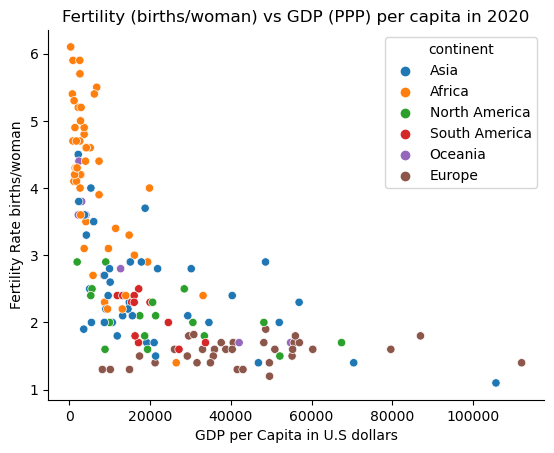

In [359]:
sns.scatterplot(x='GDP per capita',y='Fertility',data=world,hue='continent')
plt.title('Fertility (births/woman) vs GDP (PPP) per capita in 2020')
plt.xlabel('GDP per Capita in U.S dollars')
plt.ylabel('Fertility Rate births/woman')
sns.despine()
plt.show()

African countries generally have higher fertility rates compared to European countries, and they also tend to have lower GDP per capita. Meanwhile, European countries have lower fertility rates and higher GDP per capita.

In [360]:
world.corr()

,Fertility,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio,Urbanization rate,Suicide rate
Fertility,1.000000,-0.630489,-0.860008,-0.623430,0.712122,-0.863140,-0.033831,-0.565677,0.109520
GDP per capita,-0.630489,1.000000,0.724637,0.757297,-0.319113,0.700006,0.218813,0.648451,-0.030010
Life expectancy,-0.860008,0.724637,1.000000,0.694356,-0.541370,0.826868,0.048851,0.632562,-0.263790
Meat consumption,-0.623430,0.757297,0.694356,1.000000,-0.425440,0.691542,0.059839,0.602274,-0.092466
Population growth,0.712122,-0.319113,-0.541370,-0.425440,1.000000,-0.768717,0.249625,-0.341631,-0.149174
Median age,-0.863140,0.700006,0.826868,0.691542,-0.768717,1.000000,-0.076430,0.567204,0.018912
Sex-ratio,-0.033831,0.218813,0.048851,0.059839,0.249625,-0.076430,1.000000,0.124869,-0.229258
Urbanization rate,-0.565677,0.648451,0.632562,0.602274,-0.341631,0.567204,0.124869,1.000000,-0.077787
Suicide rate,0.109520,-0.030010,-0.263790,-0.092466,-0.149174,0.018912,-0.229258,-0.077787,1.000000


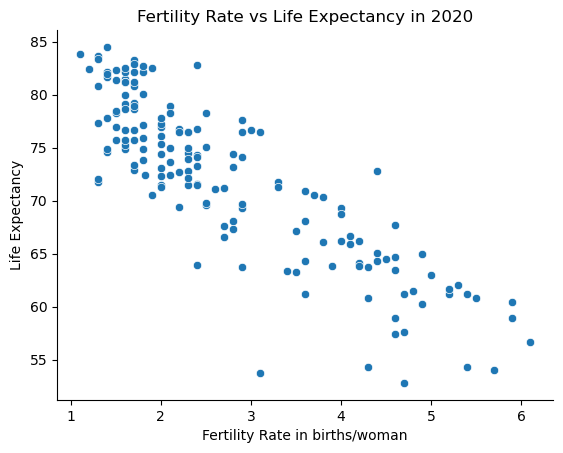

In [361]:
sns.scatterplot(x='Fertility',y='Life expectancy',data=world)
plt.title('Fertility Rate vs Life Expectancy in 2020')
plt.xlabel('Fertility Rate in births/woman')
plt.ylabel('Life Expectancy')
sns.despine()

The negative correlation between fertility rate and life expectancy means that as the fertility rate decreases, life expectancy tends to increase. This can be attributed to various factors, such as improved access to healthcare, education, and better living conditions, which have a positive impact on life expectancy. 

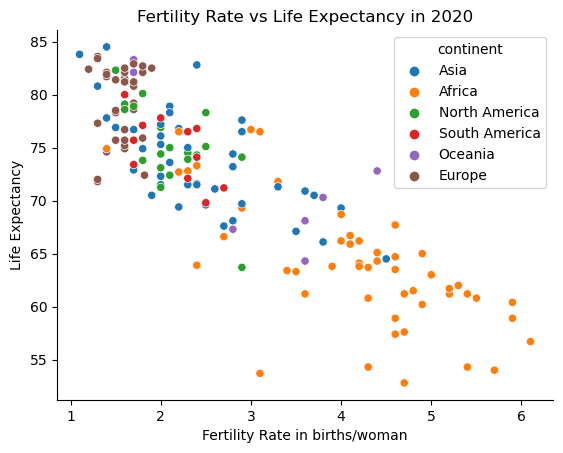

In [362]:
sns.scatterplot(x='Fertility',y='Life expectancy',data=world,hue='continent')
plt.title('Fertility Rate vs Life Expectancy in 2020')
plt.xlabel('Fertility Rate in births/woman')
plt.ylabel('Life Expectancy')
sns.despine() 

African countries have some of the lowest life expectancy in the world, but some of the highest fertility rates.
European countries have high life expectancy and low fertility rates, while Asian countries tend to have relatively  moderate to high life expectancy and relatively moderate to high fertility rates.

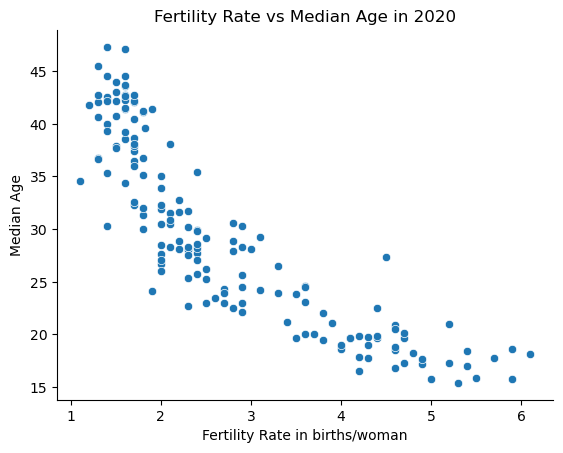

In [363]:
sns.scatterplot(x='Fertility',y='Median age',data=world)
plt.title('Fertility Rate vs Median Age in 2020')
plt.xlabel('Fertility Rate in births/woman')
plt.ylabel('Median Age')
sns.despine()

In 2020, the graph illustrates a strong negative correlation of -0.86 between fertility rate and median age. Countries with a higher fertility rate tend to have a lower median age, meaning a relatively younger population.

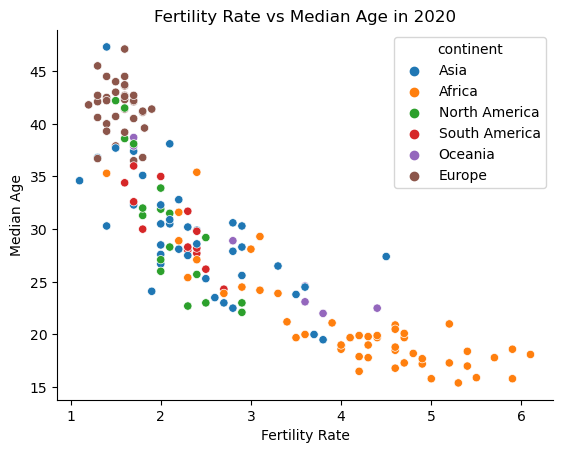

In [364]:
sns.scatterplot(x='Fertility',y='Median age',data=world,hue='continent')
plt.title('Fertility Rate vs Median Age in 2020')
plt.xlabel('Fertility Rate')
plt.ylabel('Median Age')
sns.despine()

African countries have some of the youngest populations and highest fertility rates. European countries have some of the lowest fertility rates and oldest population. 

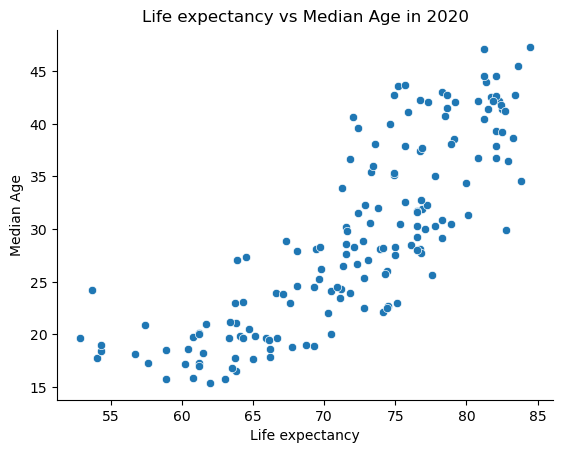

In [365]:
sns.scatterplot(x='Life expectancy',y='Median age',data=world)
plt.title('Life expectancy vs Median Age in 2020')
plt.xlabel('Life expectancy')
plt.ylabel('Median Age')
sns.despine()

Countries with a high life expectancy tend to have an older population than countries with a low life expectancy. 

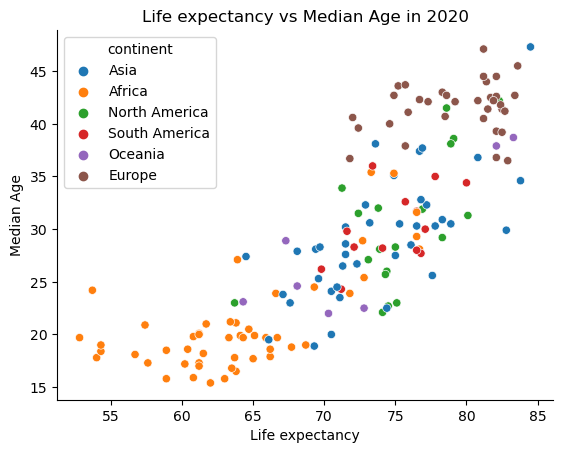

In [366]:
sns.scatterplot(x='Life expectancy',y='Median age',data=world,hue='continent')
plt.title('Life expectancy vs Median Age in 2020')
plt.xlabel('Life expectancy')
plt.ylabel('Median Age')
sns.despine()

A high median age is often associated with a higher life expectancy, and this relationship is particularly strong in the case of European countries. In contrast, African countries generally have lower life expectancies, which may be attributed to a variety of factors, including poor healthcare systems, high rates of infectious diseases, and inadequate nutrition.

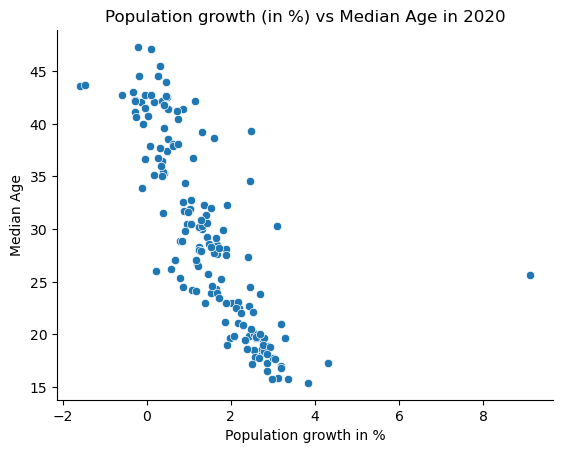

In [367]:
sns.scatterplot(x='Population growth',y='Median age',data=world)
plt.title('Population growth (in %) vs Median Age in 2020')
plt.xlabel('Population growth in %')
plt.ylabel('Median Age')
sns.despine()

 The negative correlation coefficient of -0.76 indicates a strong negative relationship between population growth and median age. This means that countries with a higher population growth rate tend to have a younger population, while countries with a lower population growth rate tend to have an older population.

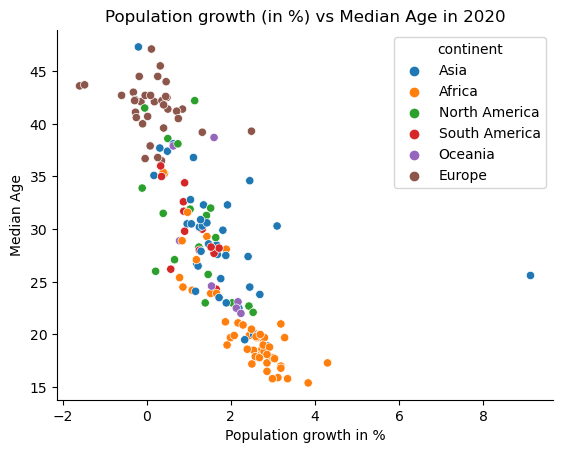

In [368]:
sns.scatterplot(x='Population growth',y='Median age',data=world,hue='continent')
plt.title('Population growth (in %) vs Median Age in 2020')
plt.xlabel('Population growth in %')
plt.ylabel('Median Age')
sns.despine()

European countries exhibit a low population growth rate and a relatively high median age. In contrast, African countries have a relatively high population growth rate and a younger population.

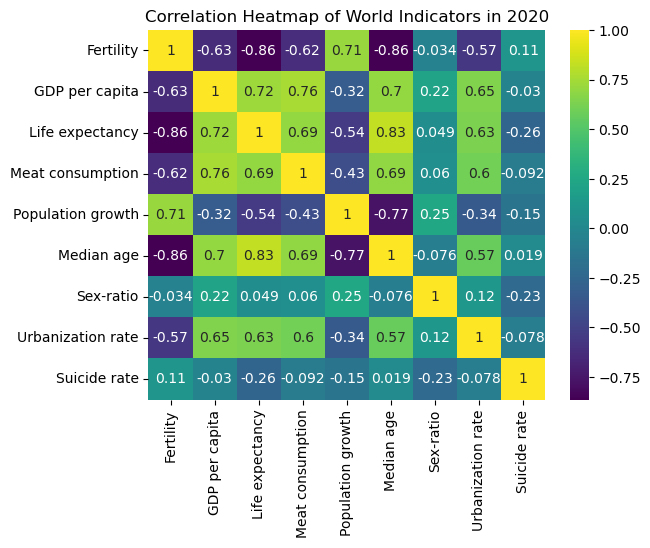

In [410]:
corr_matrix = world.corr()

sns.set_theme
sns.heatmap(corr_matrix,annot=True,cmap='viridis')
plt.title('Correlation Heatmap of World Indicators in 2020')
plt.show()

The heatmap displays the correlation coefficient between various variables, indicating the strength and direction of their relationship. Variables with a correlation coefficient between 0 and 0.3 are considered to have a weak positive relationship, while those with a coefficient between 0.3 and 0.7 have a moderate positive relationship, and those between 0.7 and 1 have a strong positive relationship.

For instance, there is a strong negative relationship between life expectancy and fertility, with a correlation coefficient of -0.86. This implies that as life expectancy increases, fertility rates tend to decrease.

# Distribution of Variables 

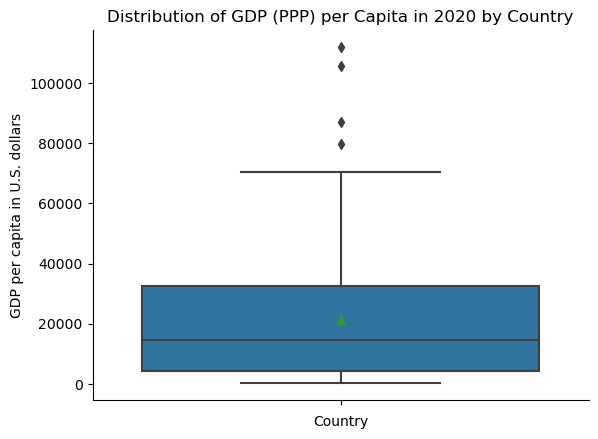

In [412]:
sns.boxplot(y='GDP per capita',data=world,showmeans=True)
plt.title('Distribution of GDP (PPP) per Capita in 2020 by Country')
plt.xlabel('Country')
plt.ylabel('GDP per capita in U.S. dollars')
sns.despine()
plt.show() 

The graph displays the distribution of GDP per capita in 2020. The median GDP per capita was 14,654 USD and the mean was 21,111 USD. The range of GDP per capita was quite large, with the lowest being 314 USD and the highest being 112,000 USD. However, the data points were tightly clustered together as evidenced by the standard deviation of 21,186 USD. There were four outliers in the dataset with a considerably higher GDP per capita.

In [371]:
world['GDP per capita'].describe()

count       162.000000
mean      21111.780864
std       21186.758434
min         314.500000
25%        4333.250000
50%       14654.500000
75%       32644.250000
max      112045.000000
Name: GDP per capita, dtype: float64

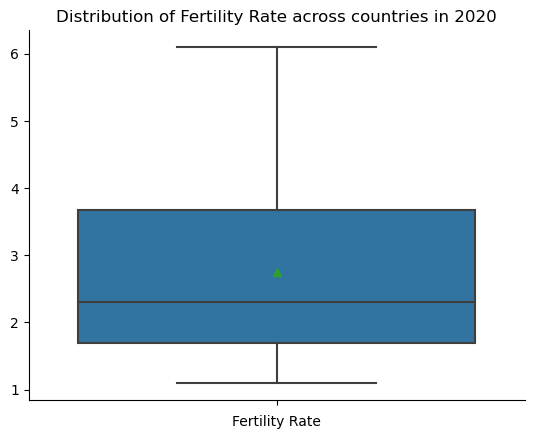

In [414]:
sns.boxplot(y='Fertility',data=world,showmeans=True)
plt.title('Distribution of Fertility Rate across countries in 2020')
plt.xlabel('Fertility Rate')
plt.ylabel('')
sns.despine()
plt.show()

The graph illustrates the frequency distribution of fertility rates across the countries in the dataset. The majority of data points are closely clustered around the mean, suggesting a relatively normal distribution. The average fertility rate was 2.75, while the median was slightly lower at 2.3. The range of fertility rates was relatively wide, with the smallest rate being 1.1 and the largest being 6.1.

In [373]:
world['Fertility'].describe()

count    162.000000
mean       2.751975
std        1.273638
min        1.100000
25%        1.700000
50%        2.300000
75%        3.675000
max        6.100000
Name: Fertility, dtype: float64

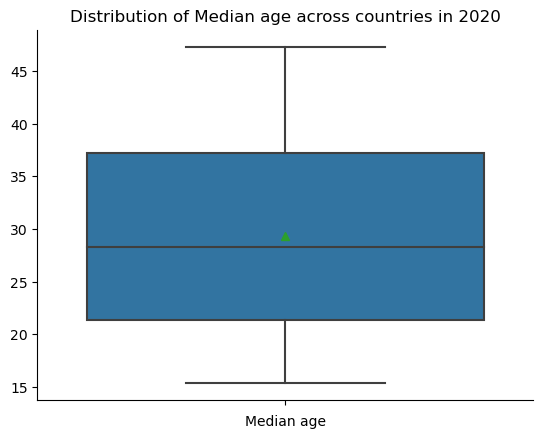

In [416]:
sns.boxplot(y='Median age',data=world,showmeans=True)
plt.title('Distribution of Median age across countries in 2020')
plt.xlabel('Median age')
plt.ylabel('')
sns.despine()
plt.show()

The graph illustrates the distribution of median age across the countries in the dataset in 2020. The data points are tightly clustered together. The average median age is 29.38. The youngest median age is 15.8 years old while the oldest median age is 47.3. There are no outliers in the dataset.

In [375]:
world['Median age'].describe()

count    162.000000
mean      29.383333
std        8.799762
min       15.400000
25%       21.400000
50%       28.300000
75%       37.250000
max       47.300000
Name: Median age, dtype: float64

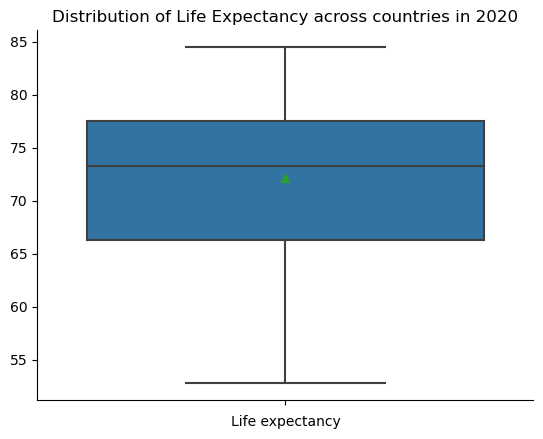

In [417]:
sns.boxplot(y='Life expectancy',data=world,showmeans=True)
plt.title('Distribution of Life Expectancy across countries in 2020')
plt.xlabel('Life expectancy')
plt.ylabel('')
sns.despine()
plt.show()

The graph displays the distribution of Life expectancy for the countries in our dataset in 2020. The average life expectancy is 72 years. The datapoints are clustered tightly around the mean. The highest life expectancy is 84 years and the lowest is 52.8 years. There are no outliers in the dataset. 

In [377]:
world['Life expectancy'].describe()

count    162.000000
mean      72.086728
std        7.616843
min       52.800000
25%       66.300000
50%       73.250000
75%       77.525000
max       84.500000
Name: Life expectancy, dtype: float64

# Continents

In [378]:
region = world.groupby('continent').mean().reset_index()
region

,continent,Fertility,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio,Urbanization rate,Suicide rate
0,Africa,4.164000,6273.410000,63.898000,16.808000,2.358800,20.878000,0.984400,46.358000,11.314000
1,Asia,2.441026,22237.666667,73.756410,36.238462,1.738462,29.112821,1.063077,57.743590,7.382051
2,Europe,1.550588,43098.352941,79.297059,75.994118,0.154412,41.608824,0.950882,73.767647,11.861765
3,North America,2.105263,21875.263158,75.250000,58.773684,1.127895,30.326316,0.978947,64.131579,6.794737
4,Oceania,3.085714,17315.571429,72.600000,62.400000,1.584286,28.242857,1.004286,49.885714,8.900000
5,South America,2.161538,18229.692308,74.815385,57.484615,1.066923,30.169231,0.986154,73.307692,11.769231


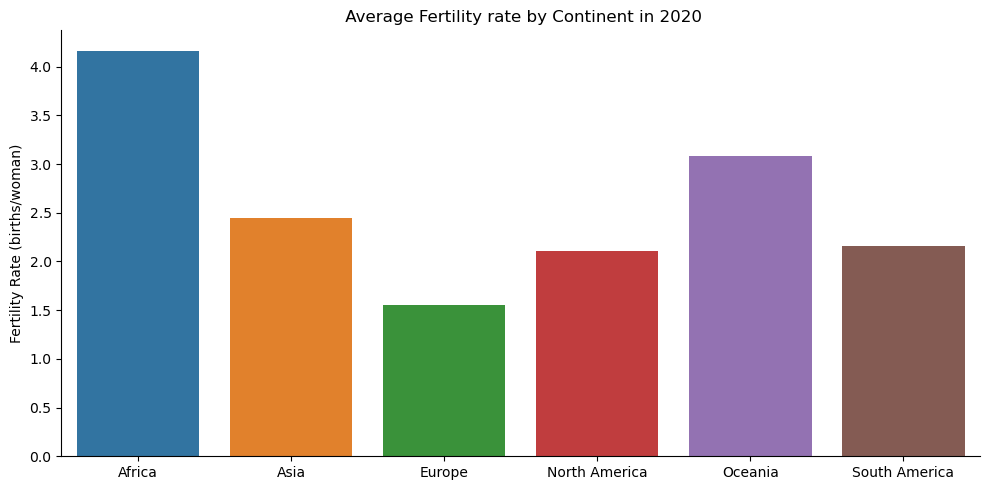

In [418]:
plt.figure(figsize=(10,5))
sns.barplot(x='continent',y='Fertility',data=region)
plt.title(' Average Fertility rate by Continent in 2020')
plt.xlabel('')
plt.ylabel('Fertility Rate (births/woman)')
sns.despine()
plt.tight_layout()

The graph displays the average fertility rate by continent in 2020. Oceania and Africa have the highest average fertility rates, while Europe and North America have the lowest. This may be attributed to the fact that European countries have some of the highest GDP per capita in the world, resulting in a high opportunity cost for educated women to leave the workforce and have children. In contrast, many Asian and African countries have cultural and societal norms that encourage women to prioritize motherhood over a career.

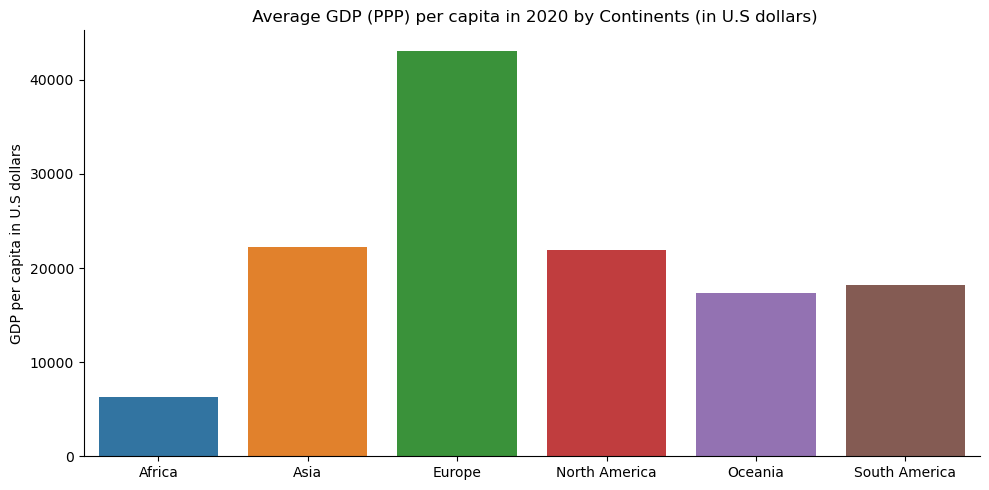

In [421]:
plt.figure(figsize=(10,5))
sns.barplot(x='continent',y='GDP per capita',data=region)
plt.title(' Average GDP (PPP) per capita in 2020 by Continents (in U.S dollars)')
plt.xlabel('')
plt.ylabel('GDP per capita in U.S dollars')
sns.despine()
plt.tight_layout()

The graph represents the average gdp per caputa in 2020 by continents. Europe has the highest average gdp per capita. North America and Asia have a similar average gdp per capita. Africa has the lowest average gdp per capita.Additionally, it's worth noting that Oceania has a higher average GDP per capita than Africa, but lower than Asia, North America, and Europe. 

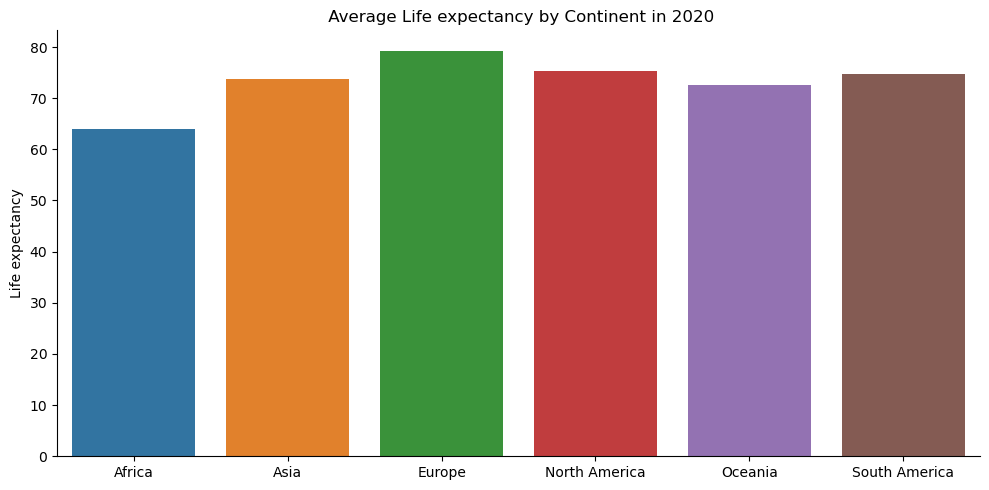

In [381]:
plt.figure(figsize=(10,5))
sns.barplot(x='continent',y='Life expectancy',data=region)
plt.title(' Average Life expectancy by Continent in 2020')
plt.xlabel('')
plt.ylabel('Life expectancy')
sns.despine()
plt.tight_layout() 

The graph illustrates the average life expectancy in 2020 for each continent. Europe has the highest average life expectancy of 79 years, followed by North America and South America with almost the same average life expectancy. In contrast, Africa has the lowest average life expectancy of around 64 years.

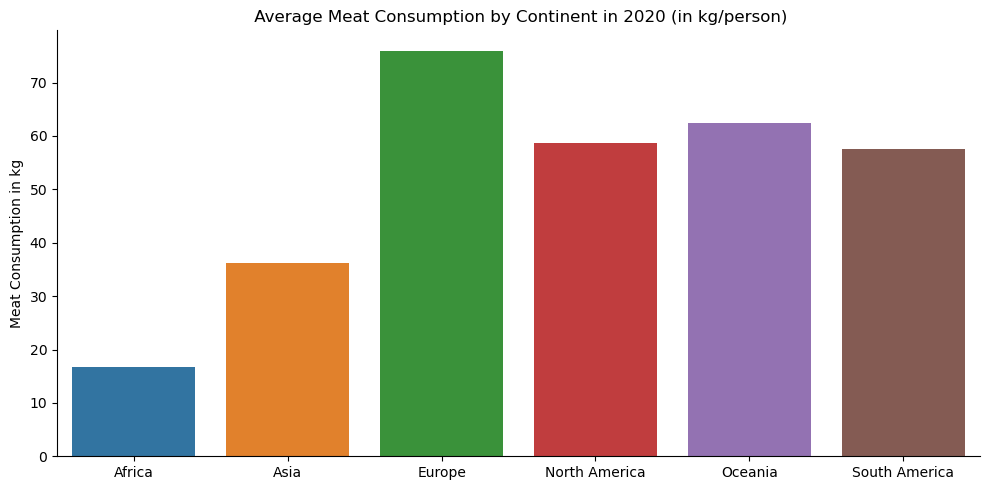

In [384]:
plt.figure(figsize=(10,5))
sns.barplot(x='continent',y='Meat consumption',data=region)
plt.title(' Average Meat Consumption by Continent in 2020 (in kg/person)')
plt.xlabel('')
plt.ylabel('Meat Consumption in kg')
sns.despine()
plt.tight_layout()

This graph depicts the average per capita meat consumption in 2020 across different continents. It indicates that Europe has the highest average meat consumption per person, with an average of 75 kilograms of meat consumed per year. On the other hand, Africa has the lowest average meat consumption per person, with an average of 16.8 kilograms of meat consumed per year. The trend suggests that wealthier countries tend to consume more meat, while in Africa, meat is often considered a luxury and is not as widely available or affordable as in other parts of the world.

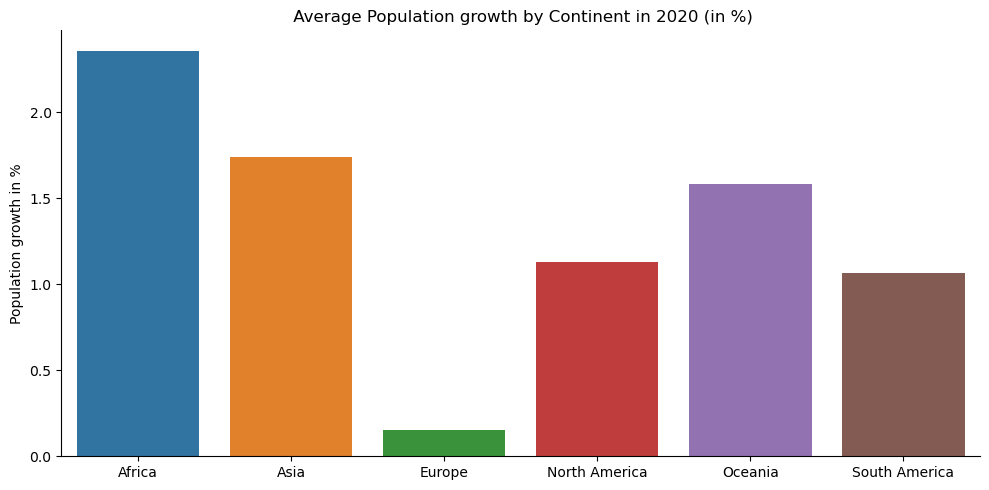

In [385]:
plt.figure(figsize=(10,5))
sns.barplot(x='continent',y='Population growth',data=region)
plt.title(' Average Population growth by Continent in 2020 (in %)')
plt.xlabel('')
plt.ylabel('Population growth in %')
sns.despine()
plt.tight_layout()

The graph displays the average population growth rate of each continent in 2020. Africa had the highest average population growth rate at 2.3%, followed by Asia at 1.7%. In contrast, Europe had the lowest population growth rate with only 0.15%, indicating a slow growth rate compared to other continents.

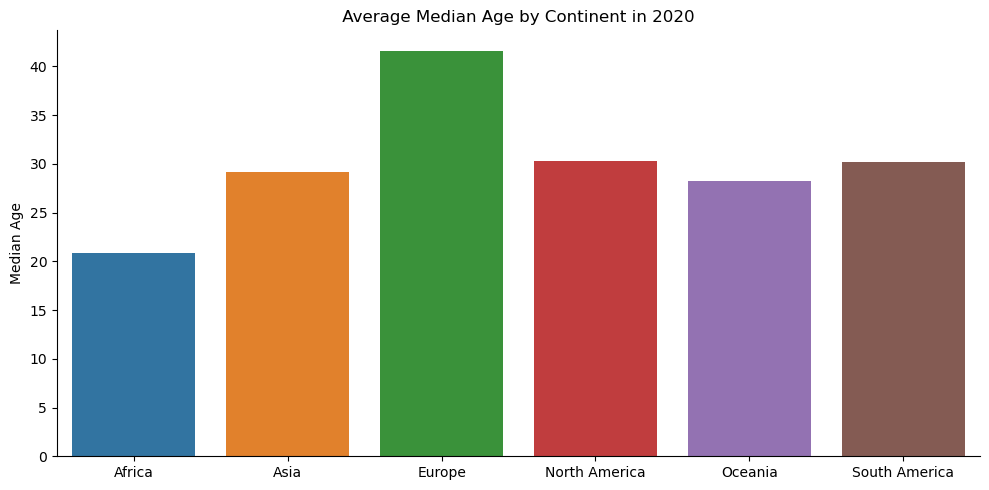

In [386]:
plt.figure(figsize=(10,5))
sns.barplot(x='continent',y='Median age',data=region)
plt.title(' Average Median Age by Continent in 2020 ')
plt.xlabel('')
plt.ylabel('Median Age')
sns.despine()
plt.tight_layout()

According to the graph, Europe has the highest average median age among the continents, and the most number of people in Europe are around the age of 43 years. Asia, North America, Oceania, and South America have average median ages ranging from 28 to 30 years, while Africa's population is the youngest, with an average median age of around 20 years.

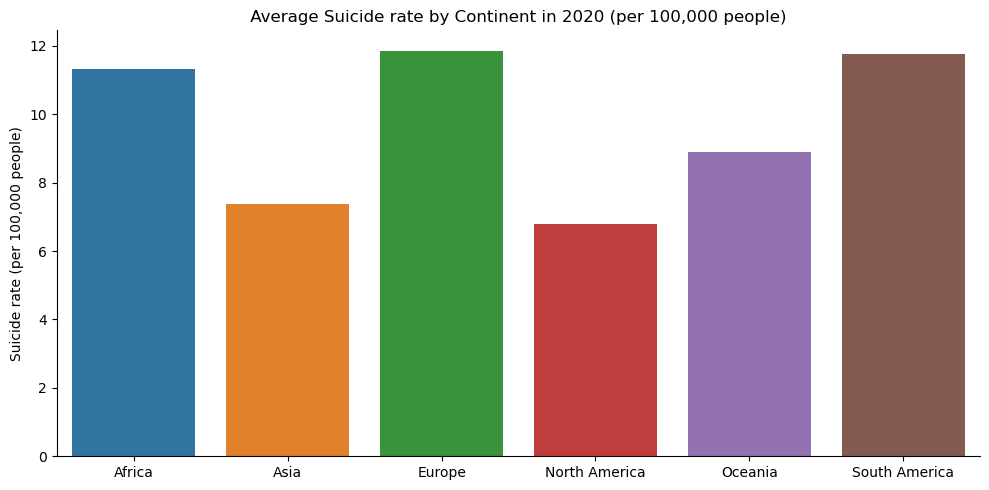

In [422]:
plt.figure(figsize=(10,5))
sns.barplot(x='continent',y='Suicide rate',data=region)
plt.title(' Average Suicide rate by Continent in 2020 (per 100,000 people) ')
plt.xlabel('')
plt.ylabel('Suicide rate (per 100,000 people)')
sns.despine()
plt.tight_layout()

The graph illustrates the average number of suicides per 100,000 people across continents. Africa, Europe, and South America have the highest suicide rates in the world, at around 11 suicides per 100,000 people. In contrast, Asia and North America have the lowest suicide rates, at around 7 suicides per 100,000 people. It may seem counterintuitive that Europe, with its more affluent population, has a higher suicide rate than Africa, but other factors such as mental health services, cultural attitudes towards suicide, and access to lethal means may contribute to this disparity. 

In [216]:
world.corr()

,Fertility,GDP per capita,Life expectancy,Meat consumption,Population growth,Median age,Sex-ratio,Urbanization rate,Suicide rate
Fertility,1.000000,-0.630489,-0.860008,-0.623430,0.712122,-0.863140,-0.033831,-0.565677,0.109520
GDP per capita,-0.630489,1.000000,0.724637,0.757297,-0.319113,0.700006,0.218813,0.648451,-0.030010
Life expectancy,-0.860008,0.724637,1.000000,0.694356,-0.541370,0.826868,0.048851,0.632562,-0.263790
Meat consumption,-0.623430,0.757297,0.694356,1.000000,-0.425440,0.691542,0.059839,0.602274,-0.092466
Population growth,0.712122,-0.319113,-0.541370,-0.425440,1.000000,-0.768717,0.249625,-0.341631,-0.149174
Median age,-0.863140,0.700006,0.826868,0.691542,-0.768717,1.000000,-0.076430,0.567204,0.018912
Sex-ratio,-0.033831,0.218813,0.048851,0.059839,0.249625,-0.076430,1.000000,0.124869,-0.229258
Urbanization rate,-0.565677,0.648451,0.632562,0.602274,-0.341631,0.567204,0.124869,1.000000,-0.077787
Suicide rate,0.109520,-0.030010,-0.263790,-0.092466,-0.149174,0.018912,-0.229258,-0.077787,1.000000


The graph illustrates several patterns in the data across continents. Europe, with its highest GDP per capita, has a higher meat consumption, older population and life expectancy, but also lower fertility rates, slower population growth, and higher suicide rates. In contrast, Africa, with the lowest GDP per capita, has higher fertility rates, faster population growth, and higher suicide rates compared to other continents. Additionally, Africa has the lowest life expectancy and meat consumption, and the youngest population.

There are various reasons for the correlation between wealth and fertility rates. One possible explanation is that women in wealthier countries are more likely to invest in their education and careers, which could lead to a higher opportunity cost for having children. Cultural and religious shifts may also play a role in the decreasing trend of fertility rates in Western countries. While it was once the norm for women to marry at a young age and have children, the rising cost of living has led many to delay having children or have fewer children. However, in some parts of the world, traditional gender roles still prevail, with men as breadwinners and women as homemakers. These factors may contribute to the lower birth rates in wealthier countries compared to other parts of the world.